In [277]:
import requests
import json
import math
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from qgridnext import show_grid
from datetime import datetime, timedelta
import sys  
import os
import pandas_ta as ta


# Ensure the directories are in the system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Data_Management')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Universe_Selection')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Signal_Generation')))

# Import the modules
from data import Data
from calculations import Calculations
from coarse import Coarse_1 as Coarse
from fine import Fine_1 as Fine
from entry_signal import Trend_Following, Mean_Reversion

In [278]:
symbols = ['BTCUSDT', 'ETHUSDT']
start_time = dt.datetime(2024, 1, 1)
end_time = dt.datetime(2024, 2, 1)
timeframe = '1h'
data = Data(symbols, timeframe, start_time, end_time).df

In [279]:
data

close  creturns      high  log_return  \
date                coin                                                
2023-12-31 19:00:00 BTCUSDT  42475.23       NaN  42554.57         NaN   
                    ETHUSDT   2295.51       NaN   2297.18         NaN   
2023-12-31 20:00:00 BTCUSDT  42613.56  1.003257  42775.00    0.003251   
                    ETHUSDT   2303.72  1.003577   2306.60    0.003570   
2023-12-31 21:00:00 BTCUSDT  42581.10  1.002493  42638.41   -0.000762   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open   returns       volume  \
date                coin                                                 
2023-12-31 19:00:00 BTCUSDT  42261.02  42283.58       NaN   1271.68108   
                    ETHUSDT   2281.27   2281.87       NaN  10771.91830   
2023-12-31 20:00:00 BTCUSDT  42431.65  42475.23  0.003257   1196.37856   
                    ETHUSDT   2292.90   2295.52  0.003577   8413.42600   
2023-12-31 21:00:00 BTCUSDT  42500.00  42613.57 -0.000762    685.21980   
...                               ...       ...       ...          ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98 -0.003925  23011.28190   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  0.003976   1398.31850   
                    ETHUSDT   2269.03   2278.99  0.002962  10362.16650   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07 -0.001783   1257.92790   
                    ETHUSDT   2281.88   2285.75 -0.001142   9636.50420   

                             volume_in_dollars  
date                coin                        
2023-12-31 19:00:00 BTCUSDT       5.401495e+07  
                    ETHUSDT       2.472705e+07  
2023-12-31 20:00:00 BTCUSDT       5.098195e+07  
                    ETHUSDT       1.938218e+07  
2023-12-31 21:00:00 BTCUSDT       2.917741e+07  
...                                        ...  
2024-01-31 16:00:00 ETHUSDT       5.244271e+07  
2024-01-31 17:00:00 BTCUSDT       5.964677e+07  
                    ETHUSDT       2.368532e+07  
2024-01-31 18:00:00 BTCUSDT       5.356257e+07  
                    ETHUSDT       2.200149e+07  

[1488 rows x 9 columns]

In [280]:
#Perform coarse analysis and filtering
coarse = Coarse()

In [281]:
df = coarse.volume_flag(data, 1000)
df

close  creturns      high  log_return  \
date                coin                                                
2023-12-31 19:00:00 BTCUSDT  42475.23       NaN  42554.57         NaN   
                    ETHUSDT   2295.51       NaN   2297.18         NaN   
2023-12-31 20:00:00 BTCUSDT  42613.56  1.003257  42775.00    0.003251   
                    ETHUSDT   2303.72  1.003577   2306.60    0.003570   
2023-12-31 21:00:00 BTCUSDT  42581.10  1.002493  42638.41   -0.000762   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open   returns       volume  \
date                coin                                                 
2023-12-31 19:00:00 BTCUSDT  42261.02  42283.58       NaN   1271.68108   
                    ETHUSDT   2281.27   2281.87       NaN  10771.91830   
2023-12-31 20:00:00 BTCUSDT  42431.65  42475.23  0.003257   1196.37856   
                    ETHUSDT   2292.90   2295.52  0.003577   8413.42600   
2023-12-31 21:00:00 BTCUSDT  42500.00  42613.57 -0.000762    685.21980   
...                               ...       ...       ...          ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98 -0.003925  23011.28190   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  0.003976   1398.31850   
                    ETHUSDT   2269.03   2278.99  0.002962  10362.16650   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07 -0.001783   1257.92790   
                    ETHUSDT   2281.88   2285.75 -0.001142   9636.50420   

                             volume_in_dollars  volume_flag  
date                coin                                     
2023-12-31 19:00:00 BTCUSDT       5.401495e+07            1  
                    ETHUSDT       2.472705e+07            1  
2023-12-31 20:00:00 BTCUSDT       5.098195e+07            1  
                    ETHUSDT       1.938218e+07            1  
2023-12-31 21:00:00 BTCUSDT       2.917741e+07            1  
...                                        ...          ...  
2024-01-31 16:00:00 ETHUSDT       5.244271e+07            1  
2024-01-31 17:00:00 BTCUSDT       5.964677e+07            1  
                    ETHUSDT       2.368532e+07            1  
2024-01-31 18:00:00 BTCUSDT       5.356257e+07            1  
                    ETHUSDT       2.200149e+07            1  

[1488 rows x 10 columns]

In [282]:
df = coarse.sort_by_volume(df)
df

close  creturns      high  log_return  \
date                coin                                                
2023-12-31 19:00:00 BTCUSDT  42475.23       NaN  42554.57         NaN   
                    ETHUSDT   2295.51       NaN   2297.18         NaN   
2023-12-31 20:00:00 BTCUSDT  42613.56  1.003257  42775.00    0.003251   
                    ETHUSDT   2303.72  1.003577   2306.60    0.003570   
2023-12-31 21:00:00 BTCUSDT  42581.10  1.002493  42638.41   -0.000762   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open   returns       volume  \
date                coin                                                 
2023-12-31 19:00:00 BTCUSDT  42261.02  42283.58       NaN   1271.68108   
                    ETHUSDT   2281.27   2281.87       NaN  10771.91830   
2023-12-31 20:00:00 BTCUSDT  42431.65  42475.23  0.003257   1196.37856   
                    ETHUSDT   2292.90   2295.52  0.003577   8413.42600   
2023-12-31 21:00:00 BTCUSDT  42500.00  42613.57 -0.000762    685.21980   
...                               ...       ...       ...          ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98 -0.003925  23011.28190   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  0.003976   1398.31850   
                    ETHUSDT   2269.03   2278.99  0.002962  10362.16650   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07 -0.001783   1257.92790   
                    ETHUSDT   2281.88   2285.75 -0.001142   9636.50420   

                             volume_in_dollars  volume_flag  volume_rank  
date                coin                                                  
2023-12-31 19:00:00 BTCUSDT       5.401495e+07            1          2.0  
                    ETHUSDT       2.472705e+07            1          1.0  
2023-12-31 20:00:00 BTCUSDT       5.098195e+07            1          2.0  
                    ETHUSDT       1.938218e+07            1          1.0  
2023-12-31 21:00:00 BTCUSDT       2.917741e+07            1          2.0  
...                                        ...          ...          ...  
2024-01-31 16:00:00 ETHUSDT       5.244271e+07            1          1.0  
2024-01-31 17:00:00 BTCUSDT       5.964677e+07            1          2.0  
                    ETHUSDT       2.368532e+07            1          1.0  
2024-01-31 18:00:00 BTCUSDT       5.356257e+07            1          2.0  
                    ETHUSDT       2.200149e+07            1          1.0  

[1488 rows x 11 columns]

In [283]:
df = coarse.sort_by_std(df, 2, 2)
df.head()

close  creturns      high  log_return  \
date                coin                                                
2023-12-31 19:00:00 BTCUSDT  42475.23       NaN  42554.57         NaN   
                    ETHUSDT   2295.51       NaN   2297.18         NaN   
2023-12-31 20:00:00 BTCUSDT  42613.56  1.003257  42775.00    0.003251   
                    ETHUSDT   2303.72  1.003577   2306.60    0.003570   
2023-12-31 21:00:00 BTCUSDT  42581.10  1.002493  42638.41   -0.000762   

                                  low      open   returns       volume  \
date                coin                                                 
2023-12-31 19:00:00 BTCUSDT  42261.02  42283.58       NaN   1271.68108   
                    ETHUSDT   2281.27   2281.87       NaN  10771.91830   
2023-12-31 20:00:00 BTCUSDT  42431.65  42475.23  0.003257   1196.37856   
                    ETHUSDT   2292.90   2295.52  0.003577   8413.42600   
2023-12-31 21:00:00 BTCUSDT  42500.00  42613.57 -0.000762    685.21980   

                             volume_in_dollars  volume_flag  volume_rank  \
date                coin                                                   
2023-12-31 19:00:00 BTCUSDT       5.401495e+07            1          2.0   
                    ETHUSDT       2.472705e+07            1          1.0   
2023-12-31 20:00:00 BTCUSDT       5.098195e+07            1          2.0   
                    ETHUSDT       1.938218e+07            1          1.0   
2023-12-31 21:00:00 BTCUSDT       2.917741e+07            1          2.0   

                             std_values  std_rank  
date                coin                           
2023-12-31 19:00:00 BTCUSDT         NaN       NaN  
                    ETHUSDT         NaN       NaN  
2023-12-31 20:00:00 BTCUSDT    0.002299       2.0  
                    ETHUSDT    0.002524       1.0  
2023-12-31 21:00:00 BTCUSDT    0.000539       2.0

In [284]:
fine = Fine()

In [285]:
df = fine.above_ema(df, 2)

In [286]:
df

close  creturns      high  log_return  \
date                coin                                                
2023-12-31 19:00:00 BTCUSDT  42475.23       NaN  42554.57         NaN   
                    ETHUSDT   2295.51       NaN   2297.18         NaN   
2023-12-31 20:00:00 BTCUSDT  42613.56  1.003257  42775.00    0.003251   
                    ETHUSDT   2303.72  1.003577   2306.60    0.003570   
2023-12-31 21:00:00 BTCUSDT  42581.10  1.002493  42638.41   -0.000762   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open   returns       volume  \
date                coin                                                 
2023-12-31 19:00:00 BTCUSDT  42261.02  42283.58       NaN   1271.68108   
                    ETHUSDT   2281.27   2281.87       NaN  10771.91830   
2023-12-31 20:00:00 BTCUSDT  42431.65  42475.23  0.003257   1196.37856   
                    ETHUSDT   2292.90   2295.52  0.003577   8413.42600   
2023-12-31 21:00:00 BTCUSDT  42500.00  42613.57 -0.000762    685.21980   
...                               ...       ...       ...          ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98 -0.003925  23011.28190   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  0.003976   1398.31850   
                    ETHUSDT   2269.03   2278.99  0.002962  10362.16650   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07 -0.001783   1257.92790   
                    ETHUSDT   2281.88   2285.75 -0.001142   9636.50420   

                             volume_in_dollars  volume_flag  volume_rank  \
date                coin                                                   
2023-12-31 19:00:00 BTCUSDT       5.401495e+07            1          2.0   
                    ETHUSDT       2.472705e+07            1          1.0   
2023-12-31 20:00:00 BTCUSDT       5.098195e+07            1          2.0   
                    ETHUSDT       1.938218e+07            1          1.0   
2023-12-31 21:00:00 BTCUSDT       2.917741e+07            1          2.0   
...                                        ...          ...          ...   
2024-01-31 16:00:00 ETHUSDT       5.244271e+07            1          1.0   
2024-01-31 17:00:00 BTCUSDT       5.964677e+07            1          2.0   
                    ETHUSDT       2.368532e+07            1          1.0   
2024-01-31 18:00:00 BTCUSDT       5.356257e+07            1          2.0   
                    ETHUSDT       2.200149e+07            1          1.0   

                             std_values  std_rank         ema_2  above_ema  
date                coin                                                    
2023-12-31 19:00:00 BTCUSDT         NaN       NaN           NaN          0  
                    ETHUSDT         NaN       NaN           NaN          0  
2023-12-31 20:00:00 BTCUSDT    0.002299       2.0  42544.395000          1  
                    ETHUSDT    0.002524       1.0   2299.615000          1  
2023-12-31 21:00:00 BTCUSDT    0.000539       2.0  42568.865000          1  
...                                 ...       ...           ...        ...  
2024-01-31 16:00:00 ETHUSDT    0.002781       1.0   2286.486103          0  
2024-01-31 17:00:00 BTCUSDT    0.002806       1.0  42637.722258          1  
                    ETHUSDT    0.002091       2.0   2285.995368          0  
2024-01-31 18:00:00 BTCUSDT    0.001262       1.0  42599.240753          0  
                    ETHUSDT    0.000808       2.0   2284.091789          0  

[1488 rows x 15 columns]

In [287]:
#Generate a signal
tf = Trend_Following()
mr = Mean_Reversion()

In [288]:
str_length = 10
str_mult = 3
_df = tf.supertrend_signals(df, str_length, str_mult)
_df

close  creturns      high  log_return  \
date                                                                    
2023-12-31 19:00:00 BTCUSDT  42475.23       NaN  42554.57         NaN   
                    ETHUSDT   2295.51       NaN   2297.18         NaN   
2023-12-31 20:00:00 BTCUSDT  42613.56  1.003257  42775.00    0.003251   
                    ETHUSDT   2303.72  1.003577   2306.60    0.003570   
2023-12-31 21:00:00 BTCUSDT  42581.10  1.002493  42638.41   -0.000762   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open   returns       volume  \
date                                                                     
2023-12-31 19:00:00 BTCUSDT  42261.02  42283.58       NaN   1271.68108   
                    ETHUSDT   2281.27   2281.87       NaN  10771.91830   
2023-12-31 20:00:00 BTCUSDT  42431.65  42475.23  0.003257   1196.37856   
                    ETHUSDT   2292.90   2295.52  0.003577   8413.42600   
2023-12-31 21:00:00 BTCUSDT  42500.00  42613.57 -0.000762    685.21980   
...                               ...       ...       ...          ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98 -0.003925  23011.28190   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  0.003976   1398.31850   
                    ETHUSDT   2269.03   2278.99  0.002962  10362.16650   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07 -0.001783   1257.92790   
                    ETHUSDT   2281.88   2285.75 -0.001142   9636.50420   

                             volume_in_dollars  volume_flag  volume_rank  \
date                                                                       
2023-12-31 19:00:00 BTCUSDT       5.401495e+07            1          2.0   
                    ETHUSDT       2.472705e+07            1          1.0   
2023-12-31 20:00:00 BTCUSDT       5.098195e+07            1          2.0   
                    ETHUSDT       1.938218e+07            1          1.0   
2023-12-31 21:00:00 BTCUSDT       2.917741e+07            1          2.0   
...                                        ...          ...          ...   
2024-01-31 16:00:00 ETHUSDT       5.244271e+07            1          1.0   
2024-01-31 17:00:00 BTCUSDT       5.964677e+07            1          2.0   
                    ETHUSDT       2.368532e+07            1          1.0   
2024-01-31 18:00:00 BTCUSDT       5.356257e+07            1          2.0   
                    ETHUSDT       2.200149e+07            1          1.0   

                             std_values  std_rank         ema_2  above_ema  \
date                                                                         
2023-12-31 19:00:00 BTCUSDT         NaN       NaN           NaN          0   
                    ETHUSDT         NaN       NaN           NaN          0   
2023-12-31 20:00:00 BTCUSDT    0.002299       2.0  42544.395000          1   
                    ETHUSDT    0.002524       1.0   2299.615000          1   
2023-12-31 21:00:00 BTCUSDT    0.000539       2.0  42568.865000          1   
...                                 ...       ...           ...        ...   
2024-01-31 16:00:00 ETHUSDT    0.002781       1.0   2286.486103          0   
2024-01-31 17:00:00 BTCUSDT    0.002806       1.0  42637.722258          1   
                    ETHUSDT    0.002091       2.0   2285.995368          0   
2024-01-31 18:00:00 BTCUSDT    0.001262       1.0  42599.240753          0   
                    ETHUSDT    0.000808       2.0   2284.091789          0   

                             SUPERT_10_3.0  SUPERTd_10_3.0  SUPERTl_10_3.0  \
date                                 

In [289]:
condition = _df[f'SUPERTd_{str_length}_{float(str_mult)}'] == 1
_df['position'] = np.where(condition, 1, 0)
_df['position'] = _df['position'].shift(len(_df.index.get_level_values(1).unique())).fillna(0)
_df = Calculations().trades(_df)
_df = Calculations().strategy_returns(_df)
_df = Calculations().sessions(_df)
_df

close  creturns      high  log_return  \
date                                                                    
2023-12-31 19:00:00 BTCUSDT  42475.23       NaN  42554.57         NaN   
                    ETHUSDT   2295.51       NaN   2297.18         NaN   
2023-12-31 20:00:00 BTCUSDT  42613.56  1.003257  42775.00    0.003251   
                    ETHUSDT   2303.72  1.003577   2306.60    0.003570   
2023-12-31 21:00:00 BTCUSDT  42581.10  1.002493  42638.41   -0.000762   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open   returns       volume  \
date                                                                     
2023-12-31 19:00:00 BTCUSDT  42261.02  42283.58       NaN   1271.68108   
                    ETHUSDT   2281.27   2281.87       NaN  10771.91830   
2023-12-31 20:00:00 BTCUSDT  42431.65  42475.23  0.003257   1196.37856   
                    ETHUSDT   2292.90   2295.52  0.003577   8413.42600   
2023-12-31 21:00:00 BTCUSDT  42500.00  42613.57 -0.000762    685.21980   
...                               ...       ...       ...          ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98 -0.003925  23011.28190   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  0.003976   1398.31850   
                    ETHUSDT   2269.03   2278.99  0.002962  10362.16650   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07 -0.001783   1257.92790   
                    ETHUSDT   2281.88   2285.75 -0.001142   9636.50420   

                             volume_in_dollars  volume_flag  ...  \
date                                                         ...   
2023-12-31 19:00:00 BTCUSDT       5.401495e+07            1  ...   
                    ETHUSDT       2.472705e+07            1  ...   
2023-12-31 20:00:00 BTCUSDT       5.098195e+07            1  ...   
                    ETHUSDT       1.938218e+07            1  ...   
2023-12-31 21:00:00 BTCUSDT       2.917741e+07            1  ...   
...                                        ...          ...  ...   
2024-01-31 16:00:00 ETHUSDT       5.244271e+07            1  ...   
2024-01-31 17:00:00 BTCUSDT       5.964677e+07            1  ...   
                    ETHUSDT       2.368532e+07            1  ...   
2024-01-31 18:00:00 BTCUSDT       5.356257e+07            1  ...   
                    ETHUSDT       2.200149e+07            1  ...   

                             SUPERT_10_3.0  SUPERTd_10_3.0  SUPERTl_10_3.0  \
date                                                                         
2023-12-31 19:00:00 BTCUSDT       0.000000               1             NaN   
                    ETHUSDT       0.000000               1             NaN   
2023-12-31 20:00:00 BTCUSDT            NaN               1             NaN   
                    ETHUSDT            NaN               1             NaN   
2023-12-31 21:00:00 BTCUSDT            NaN               1             NaN   
...                                    ...             ...             ...   
2024-01-31 16:00:00 ETHUSDT    2346.264505              -1             NaN   
2024-01-31 17:00:00 BTCUSDT   43680.887427              -1             NaN   
                    ETHUSDT    2345.623055              -1             NaN   
2024-01-31 18:00:00 BTCUSDT   43680.887427              -1             NaN   
                    ETHUSDT    2345.623055              -1             NaN   

                             SUPERTs_10_3.0  position  trades  strategy  \
date                                                                      
2023-12-31 19:00:00 BTCUSDT             NaN       0.0     0.0       N

---

We need a:

1. Normalized Trailing Stop Loss 
2. Normalized Fixed Stop Loss 
3. Same as the above for take profit

Normalized means: based on volatility or another indicator (or metric)

## Stop Loss

### Fixed Stop Loss (Based on indicator)

Logic:

1. Add sessions: Make group sessions column that identifies each time we have a trade. (so trade #1, 2, 3, ...)
2. Add session Returns: For each group session, calculate the strategy returns for each given session.
3. For each beginning of a session calculate the stop loss price (provide a new column) -> ffill() until the end of a session OR you could use .transform('first')
4. For each beginning of a session calculate the take profit price (provide a new column) -> ffill() until the end of a session OR you could use .transform('first')
5. For each session, check if any of the low prices goes below stop loss or high prices goes above take profit -> make a new position column that indicates a 0 whenever we exit a trade by a stop loss (for the rest of the column), 0.5 whenever we exit by a take profit and 1 when a position is still on.
6. Recalculate all columns that requires the position column to be calculated. (see in the cells below)


Note: The same process applies for fixed percentage stop loss. We could treat the fixed stop loss as a column with constant values instead of changing values.
Practically, we have to convert all the stop losses relative to the entry price (most likely the closing price), so if the stop loss is 2%, then for each row, we take price * (1 - 0.02). Then for each session, we just look for when the stop loss gets hit and close the position (making it = 0), and recompute all the necessary information.


In [290]:
#calculate the atr indicator
atr_length = 14

for_testing = _df #This is to test df later on, when we put everything together in a function

_df = _df.unstack()
for coin in _df.columns.levels[1]:
    high, low, close = _df['high', coin], _df['low', coin], _df['close', coin]
    _df['atr', coin] = ta.atr(high, low, close, length=atr_length)

#### NOTE!!!!:
We have to warm up the data (getting extra data for the max length of calculations -> ex: str_length = 10, atr_length = 14, we warm up the data by atr_length) then we slice the data. 

This is to ensure that when we calculate our positions, we don't cut a current position. This will mess up our data.

Practically, we need to get the ['expected'] maximum value of the required warm up data (using the maximum needed calculations related to the data) Then we slice the data from the length of the warm up data until the end (using .iloc[warmup_data_length:])

In [291]:
_df.iloc[atr_length:]

close           creturns                high           \
                      BTCUSDT  ETHUSDT   BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT   
date                                                                            
2024-01-01 09:00:00  42612.24  2300.99  1.003226  1.002387  42715.55  2305.11   
2024-01-01 10:00:00  42783.05  2314.70  1.007247  1.008360  42847.07  2318.34   
2024-01-01 11:00:00  42725.15  2309.89  1.005884  1.006264  42856.00  2319.55   
2024-01-01 12:00:00  42812.70  2313.76  1.007945  1.007950  42824.90  2317.09   
2024-01-01 13:00:00  43111.10  2326.90  1.014970  1.013675  43208.86  2331.77   
...                       ...      ...       ...       ...       ...      ...   
2024-01-31 14:00:00  43334.64  2323.38  1.020233  1.012141  43551.99  2342.26   
2024-01-31 15:00:00  42541.18  2287.98  1.001553  0.996720  43361.10  2324.67   
2024-01-31 16:00:00  42487.12  2279.00  1.000280  0.992808  42707.68  2292.37   
2024-01-31 17:00:00  42656.07  2285.75  1.004258  0.995748  42690.42  2287.94   
2024-01-31 18:00:00  42580.00  2283.14  1.002467  0.994611  42688.88  2288.91   

                    log_return                 low           ...  strategy  \
                       BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT  ...   BTCUSDT   
date                                                         ...             
2024-01-01 09:00:00  -0.002421 -0.001377  42580.00  2294.84  ... -0.002418   
2024-01-01 10:00:00   0.004000  0.005941  42586.51  2299.20  ...  0.004008   
2024-01-01 11:00:00  -0.001354 -0.002080  42664.42  2306.53  ... -0.001353   
2024-01-01 12:00:00   0.002047  0.001674  42704.42  2306.48  ...  0.002049   
2024-01-01 13:00:00   0.006946  0.005663  42812.70  2313.76  ...  0.006970   
...                        ...       ...       ...      ...  ...       ...   
2024-01-31 14:00:00  -0.004116 -0.005259  43041.10  2309.51  ... -0.004108   
2024-01-31 15:00:00  -0.018480 -0.015354  42519.92  2286.11  ... -0.018310   
2024-01-31 16:00:00  -0.001272 -0.003933  42276.84  2263.57  ... -0.000000   
2024-01-31 17:00:00   0.003969  0.002957  42381.10  2269.03  ...  0.000000   
2024-01-31 18:00:00  -0.001785 -0.001143  42555.46  2281.88  ... -0.000000   

                              session         session_compound            \
                      ETHUSDT BTCUSDT ETHUSDT          BTCUSDT   ETHUSDT   
date                                                                       
2024-01-01 09:00:00 -0.001376     1.0     1.0         1.000014  0.998892   
2024-01-01 10:00:00  0.005958     1.0     1.0         1.004031  1.004862   
2024-01-01 11:00:00 -0.002078     1.0     1.0         1.002673  1.002776   
2024-01-01 12:00:00  0.001675     1.0     1.0         1.004730  1.004457   
2024-01-01 13:00:00  0.005679     1.0     1.0         1.011757  1.010178   
...                       ...     ...     ...              ...       ...   
2024-01-31 14:00:00 -0.005245    17.0    13.0         0.996810  0.989848   
2024-01-31 15:00:00 -0.015236    17.0    13.0         0.978724  0.974881   
2024-01-31 16:00:00 -0.003925    17.0    13.0         0.978724  0.971062   
2024-01-31 17:00:00  0.000000    18.0    13.0         1.000000  0.971062   
2024-01-31 18:00:00 -0.000000    18.0    14.0         1.000000  1.000000   

                    overall_session_return                   atr             
                                   BTCUSDT   ETHUSDT     BTCUSDT    ETHUSDT  
date                                                                         
2024-01-01 09:00:00               0.026950  0.023941  169.721566  10.174832  
2024-01-01 10:00:00               0.026950  0.023941  179.391771  11.129219  
2024-01-01 11:00:00               0.026950  0.023941  180.645360  11.323691  
2024-01-01 12:00:00               0.026950  0.023941  174.645737  11.252522  
2024-01-01 13:00:00               0.026950  0.023941  196.127177  11.907832  
...                                    ...       ...         ...        ...  
2024-01-31 14:00:00          

In [292]:

_df.head()

close           creturns                high           \
                      BTCUSDT  ETHUSDT   BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT   
date                                                                            
2023-12-31 19:00:00  42475.23  2295.51       NaN       NaN  42554.57  2297.18   
2023-12-31 20:00:00  42613.56  2303.72  1.003257  1.003577  42775.00  2306.60   
2023-12-31 21:00:00  42581.10  2293.02  1.002493  0.998915  42638.41  2304.72   
2023-12-31 22:00:00  42330.49  2273.81  0.996592  0.990547  42586.64  2294.50   
2023-12-31 23:00:00  42399.99  2279.55  0.998229  0.993047  42399.99  2279.86   

                    log_return                 low           ...  strategy  \
                       BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT  ...   BTCUSDT   
date                                                         ...             
2023-12-31 19:00:00        NaN       NaN  42261.02  2281.27  ...       NaN   
2023-12-31 20:00:00   0.003251  0.003570  42431.65  2292.90  ...  0.003257   
2023-12-31 21:00:00  -0.000762 -0.004655  42500.00  2291.20  ... -0.000762   
2023-12-31 22:00:00  -0.005903 -0.008413  42230.08  2271.00  ... -0.005885   
2023-12-31 23:00:00   0.001640  0.002521  42209.46  2265.24  ...  0.001642   

                              session         session_compound            \
                      ETHUSDT BTCUSDT ETHUSDT          BTCUSDT   ETHUSDT   
date                                                                       
2023-12-31 19:00:00       NaN     0.0     0.0              NaN       NaN   
2023-12-31 20:00:00  0.003577     0.0     0.0         1.003262  1.003583   
2023-12-31 21:00:00 -0.004645     1.0     1.0         0.999239  0.995366   
2023-12-31 22:00:00 -0.008378     1.0     1.0         0.993375  0.987062   
2023-12-31 23:00:00  0.002524     1.0     1.0         0.995007  0.989557   

                    overall_session_return               atr          
                                   BTCUSDT   ETHUSDT BTCUSDT ETHUSDT  
date                                                                  
2023-12-31 19:00:00               0.003262  0.003583     NaN     NaN  
2023-12-31 20:00:00               0.003262  0.003583     NaN     NaN  
2023-12-31 21:00:00               0.026950  0.023941     NaN     NaN  
2023-12-31 22:00:00               0.026950  0.023941     NaN     NaN  
2023-12-31 23:00:00               0.026950  0.023941     NaN     NaN  

[5 rows x 52 columns]

In [293]:
sl_mult = 1
_df = _df.stack(future_stack = True)
_df['stop_loss'] = _df['close'] - sl_mult * _df['atr']

In [294]:
from qgridnext import show_grid as show
show(_df['session'])

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [295]:
_df = _df.unstack()
for coin in _df.columns.levels[1]:
    _df['session_stop_loss', coin] = _df['stop_loss', coin].groupby(_df['session', coin]).transform('first')

_df

close           creturns                high           \
                      BTCUSDT  ETHUSDT   BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT   
date                                                                            
2023-12-31 19:00:00  42475.23  2295.51       NaN       NaN  42554.57  2297.18   
2023-12-31 20:00:00  42613.56  2303.72  1.003257  1.003577  42775.00  2306.60   
2023-12-31 21:00:00  42581.10  2293.02  1.002493  0.998915  42638.41  2304.72   
2023-12-31 22:00:00  42330.49  2273.81  0.996592  0.990547  42586.64  2294.50   
2023-12-31 23:00:00  42399.99  2279.55  0.998229  0.993047  42399.99  2279.86   
...                       ...      ...       ...       ...       ...      ...   
2024-01-31 14:00:00  43334.64  2323.38  1.020233  1.012141  43551.99  2342.26   
2024-01-31 15:00:00  42541.18  2287.98  1.001553  0.996720  43361.10  2324.67   
2024-01-31 16:00:00  42487.12  2279.00  1.000280  0.992808  42707.68  2292.37   
2024-01-31 17:00:00  42656.07  2285.75  1.004258  0.995748  42690.42  2287.94   
2024-01-31 18:00:00  42580.00  2283.14  1.002467  0.994611  42688.88  2288.91   

                    log_return                 low           ...  \
                       BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT  ...   
date                                                         ...   
2023-12-31 19:00:00        NaN       NaN  42261.02  2281.27  ...   
2023-12-31 20:00:00   0.003251  0.003570  42431.65  2292.90  ...   
2023-12-31 21:00:00  -0.000762 -0.004655  42500.00  2291.20  ...   
2023-12-31 22:00:00  -0.005903 -0.008413  42230.08  2271.00  ...   
2023-12-31 23:00:00   0.001640  0.002521  42209.46  2265.24  ...   
...                        ...       ...       ...      ...  ...   
2024-01-31 14:00:00  -0.004116 -0.005259  43041.10  2309.51  ...   
2024-01-31 15:00:00  -0.018480 -0.015354  42519.92  2286.11  ...   
2024-01-31 16:00:00  -0.001272 -0.003933  42276.84  2263.57  ...   
2024-01-31 17:00:00   0.003969  0.002957  42381.10  2269.03  ...   
2024-01-31 18:00:00  -0.001785 -0.001143  42555.46  2281.88  ...   

                    session_compound           overall_session_return  \
                             BTCUSDT   ETHUSDT                BTCUSDT   
date                                                                    
2023-12-31 19:00:00              NaN       NaN               0.003262   
2023-12-31 20:00:00         1.003262  1.003583               0.003262   
2023-12-31 21:00:00         0.999239  0.995366               0.026950   
2023-12-31 22:00:00         0.993375  0.987062               0.026950   
2023-12-31 23:00:00         0.995007  0.989557               0.026950   
...                              ...       ...                    ...   
2024-01-31 14:00:00         0.996810  0.989848              -0.021276   
2024-01-31 15:00:00         0.978724  0.974881              -0.021276   
2024-01-31 16:00:00         0.978724  0.971062              -0.021276   
2024-01-31 17:00:00         1.000000  0.971062               0.000000   
2024-01-31 18:00:00         1.000000  1.000000               0.000000   

                                      atr                stop_loss  \
                      ETHUSDT     BTCUSDT    ETHUSDT       BTCUSDT   
date                                                                 
2023-12-31 19:00:00  0.003583         NaN        NaN           NaN   
2023-12-31 20:00:00  0.003583         NaN        NaN           NaN   
2023-12-31 21:00:00  0.023941         NaN        NaN           NaN   
2023-12-31 22:00:00  0.023941         NaN        NaN           NaN   
2023-12-31 23:00:00  0.023941         NaN        NaN           NaN   
...                       ...         ...        ...           ...   
2024-01-31 14:00:00 -0.028938  324.642171  19.343813  43009.997829   
2024-01-31 15:00:00 -0.028938  361.537730  20.716398  42179.642270   
2024-01-31 16:00:00 -0.028938  366.487892  21.293798  42120.632108   
2024-01-31 17:00:00 -0.028938  362.404471  21.123526  42293.665529   
202

In [296]:
_df[['session_stop_loss', 'stop_loss', 'session']]

session_stop_loss                  stop_loss               \
                              BTCUSDT      ETHUSDT       BTCUSDT      ETHUSDT   
date                                                                            
2023-12-31 19:00:00               NaN          NaN           NaN          NaN   
2023-12-31 20:00:00               NaN          NaN           NaN          NaN   
2023-12-31 21:00:00      42442.518434  2290.815168           NaN          NaN   
2023-12-31 22:00:00      42442.518434  2290.815168           NaN          NaN   
2023-12-31 23:00:00      42442.518434  2290.815168           NaN          NaN   
...                               ...          ...           ...          ...   
2024-01-31 14:00:00      43401.698784  2317.317432  43009.997829  2304.036187   
2024-01-31 15:00:00      43401.698784  2317.317432  42179.642270  2267.263602   
2024-01-31 16:00:00      43401.698784  2317.317432  42120.632108  2257.706202   
2024-01-31 17:00:00      42293.665529  2317.317432  42293.665529  2264.626474   
2024-01-31 18:00:00      42293.665529  2263.023154  42233.951562  2263.023154   

                    session          
                    BTCUSDT ETHUSDT  
date                                 
2023-12-31 19:00:00     0.0     0.0  
2023-12-31 20:00:00     0.0     0.0  
2023-12-31 21:00:00     1.0     1.0  
2023-12-31 22:00:00     1.0     1.0  
2023-12-31 23:00:00     1.0     1.0  
...                     ...     ...  
2024-01-31 14:00:00    17.0    13.0  
2024-01-31 15:00:00    17.0    13.0  
2024-01-31 16:00:00    17.0    13.0  
2024-01-31 17:00:00    18.0    13.0  
2024-01-31 18:00:00    18.0    14.0  

[744 rows x 6 columns]

In [297]:
def define_sl_pos(group, coin):
    if (group['low', coin] <= group['session_stop_loss', coin]).any():
        start = group[group['low', coin] <= group['session_stop_loss', coin]].index[0]
        stop = group.index[-2]
        group.loc[start:stop, "position"] = 0
        return group
    else:
        return group

In [298]:
for coin in _df.columns.levels[1]:
    # Group by both the session and coin, then pass the coin as an additional argument
    test = _df.groupby(_df['session', coin], group_keys=False).apply(lambda group: define_sl_pos(group, coin))
test

close           creturns                high           \
                      BTCUSDT  ETHUSDT   BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT   
date                                                                            
2023-12-31 19:00:00  42475.23  2295.51       NaN       NaN  42554.57  2297.18   
2023-12-31 20:00:00  42613.56  2303.72  1.003257  1.003577  42775.00  2306.60   
2023-12-31 21:00:00  42581.10  2293.02  1.002493  0.998915  42638.41  2304.72   
2023-12-31 22:00:00  42330.49  2273.81  0.996592  0.990547  42586.64  2294.50   
2023-12-31 23:00:00  42399.99  2279.55  0.998229  0.993047  42399.99  2279.86   
...                       ...      ...       ...       ...       ...      ...   
2024-01-31 14:00:00  43334.64  2323.38  1.020233  1.012141  43551.99  2342.26   
2024-01-31 15:00:00  42541.18  2287.98  1.001553  0.996720  43361.10  2324.67   
2024-01-31 16:00:00  42487.12  2279.00  1.000280  0.992808  42707.68  2292.37   
2024-01-31 17:00:00  42656.07  2285.75  1.004258  0.995748  42690.42  2287.94   
2024-01-31 18:00:00  42580.00  2283.14  1.002467  0.994611  42688.88  2288.91   

                    log_return                 low           ...  \
                       BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT  ...   
date                                                         ...   
2023-12-31 19:00:00        NaN       NaN  42261.02  2281.27  ...   
2023-12-31 20:00:00   0.003251  0.003570  42431.65  2292.90  ...   
2023-12-31 21:00:00  -0.000762 -0.004655  42500.00  2291.20  ...   
2023-12-31 22:00:00  -0.005903 -0.008413  42230.08  2271.00  ...   
2023-12-31 23:00:00   0.001640  0.002521  42209.46  2265.24  ...   
...                        ...       ...       ...      ...  ...   
2024-01-31 14:00:00  -0.004116 -0.005259  43041.10  2309.51  ...   
2024-01-31 15:00:00  -0.018480 -0.015354  42519.92  2286.11  ...   
2024-01-31 16:00:00  -0.001272 -0.003933  42276.84  2263.57  ...   
2024-01-31 17:00:00   0.003969  0.002957  42381.10  2269.03  ...   
2024-01-31 18:00:00  -0.001785 -0.001143  42555.46  2281.88  ...   

                    session_compound           overall_session_return  \
                             BTCUSDT   ETHUSDT                BTCUSDT   
date                                                                    
2023-12-31 19:00:00              NaN       NaN               0.003262   
2023-12-31 20:00:00         1.003262  1.003583               0.003262   
2023-12-31 21:00:00         0.999239  0.995366               0.026950   
2023-12-31 22:00:00         0.993375  0.987062               0.026950   
2023-12-31 23:00:00         0.995007  0.989557               0.026950   
...                              ...       ...                    ...   
2024-01-31 14:00:00         0.996810  0.989848              -0.021276   
2024-01-31 15:00:00         0.978724  0.974881              -0.021276   
2024-01-31 16:00:00         0.978724  0.971062              -0.021276   
2024-01-31 17:00:00         1.000000  0.971062               0.000000   
2024-01-31 18:00:00         1.000000  1.000000               0.000000   

                                      atr                stop_loss  \
                      ETHUSDT     BTCUSDT    ETHUSDT       BTCUSDT   
date                                                                 
2023-12-31 19:00:00  0.003583         NaN        NaN           NaN   
2023-12-31 20:00:00  0.003583         NaN        NaN           NaN   
2023-12-31 21:00:00  0.023941         NaN        NaN           NaN   
2023-12-31 22:00:00  0.023941         NaN        NaN           NaN   
2023-12-31 23:00:00  0.023941         NaN        NaN           NaN   
...                       ...         ...        ...           ...   
2024-01-31 14:00:00 -0.028938  324.642171  19.343813  43009.997829   
2024-01-31 15:00:00 -0.028938  361.537730  20.716398  42179.642270   
2024-01-31 16:00:00 -0.028938  366.487892  21.293798  42120.632108   
2024-01-31 17:00:00 -0.028938  362.404471  21.123526  42293.665529   
202

Now that we have the position adjusted to account for a stop loss we need to do the following (Basically calculate (or recalculate) everything that requires the position):

1. Calculate the trades column
2. Calculate Strategy Returns (using the new changed position column)
=> Include transaction costs
3. Calculate cumulative strategy returns
4. Add sessions (rerun sessions function) again

Note that we need to the same for Take Profit (the above steps)

NOTE: Notice that stop loss when we enter a trade, and when we exit a trade as well. This is because it assumes that we enter in a new session when we exit a trade (as sessions are calculated based on trades). This should not have an impact as equity will be later formed by the strategy returns, which are then based on position (which is also changed (by 0) when we hit stop loss).

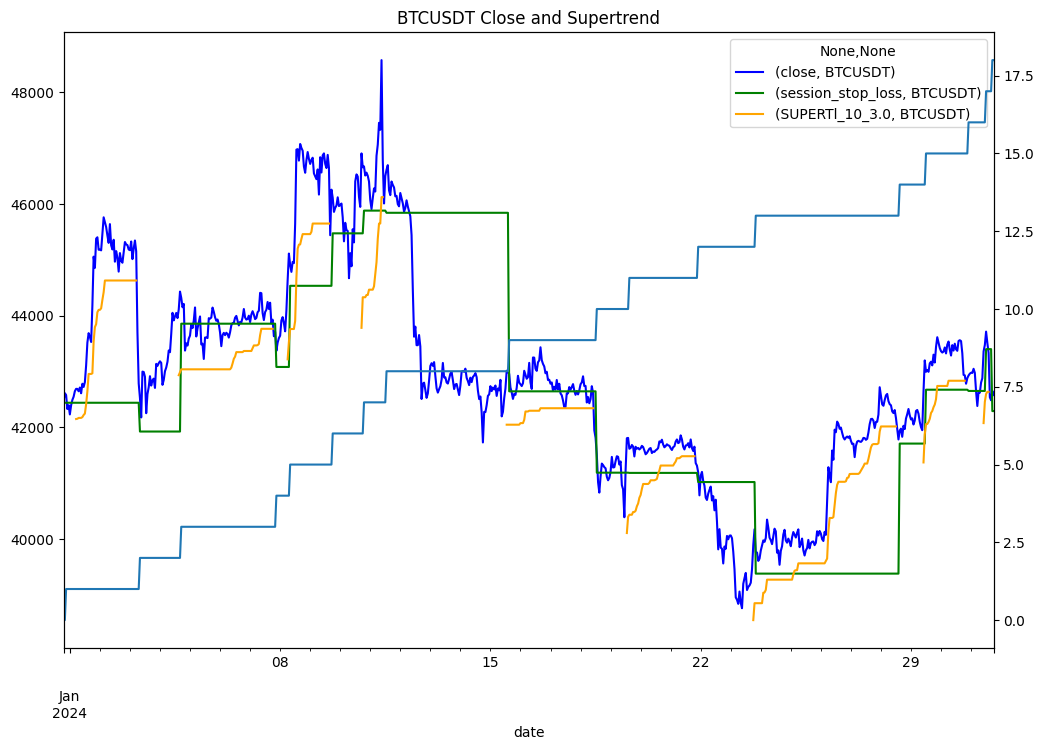

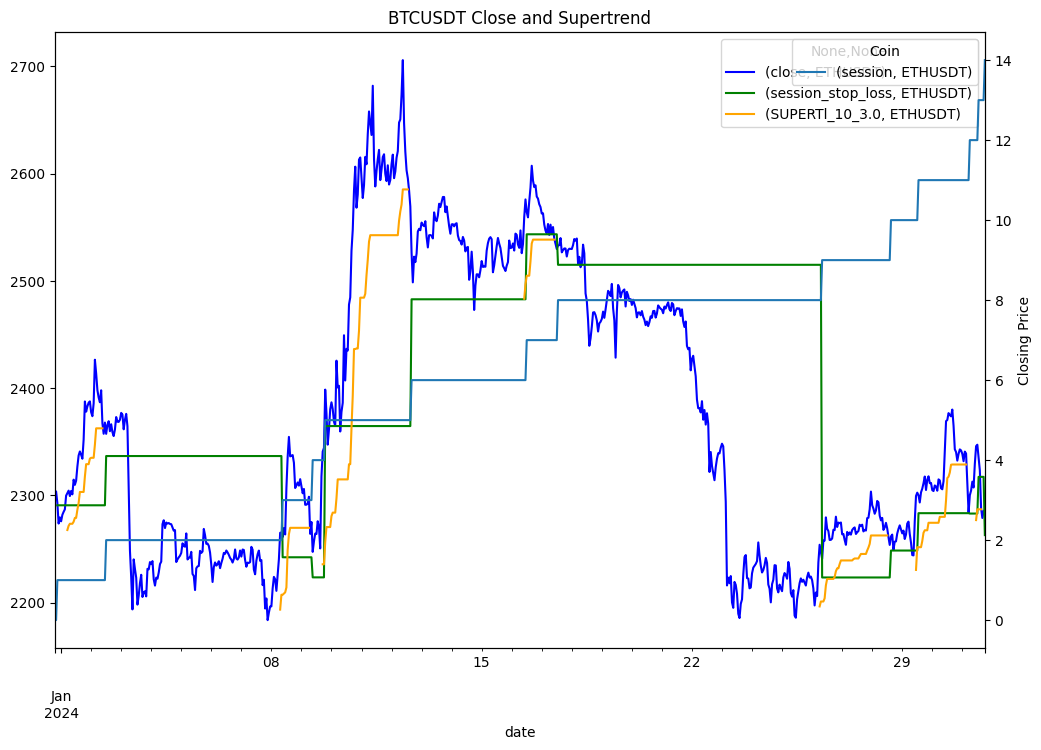

In [299]:
for coin in _df.columns.get_level_values(1).unique():
    ax1 = _df[[['close', coin], ['session_stop_loss', coin], ['SUPERTl_10_3.0', coin]]].plot(figsize=(12, 8), title = 'BTCUSDT Close and Supertrend', color = ['blue', 'green', 'orange'])
    ax2 = ax1.twinx()
    _df['session', coin].plot(ax = ax2)

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(title='Coin');



Putting everything together

In [300]:
import matplotlib.pyplot as plt
import math

def plot_sl(df):
    """
    We assume an unstacked dataframe with the following columns:
    - close
    - session_stop_loss
    """


    _df = df.copy()
    # Get unique coins
    unique_coins = _df.columns.get_level_values(1).unique()

    # Determine grid dimensions
    num_coins = len(unique_coins)
    cols = 5 # You can choose the number of columns
    rows = math.ceil(num_coins / cols)

    # Create the subplots grid
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, rows * 5))

    # Flatten the axes array for easy iteration
    axes = axes.flatten() #this makes the axes a 1D array, so we can iterate over it without going for another loop

    # Plot each coin
    for i, coin in enumerate(unique_coins):
        ax = _df[[['close', coin], ['session_stop_loss', coin]]].plot(
            ax=axes[i],
            title=f'{coin} Close and Stop Loss',
            color=['blue', 'green'],
            legend = None
        )
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('Closing Price')
        # axes[i].legend(title='Coin')
        ax2 = ax.twinx()
        _df['position', coin].plot(ax = ax2, alpha = 0.5)

        

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout()
    plt.show()

def calculate_atr_fixed_sl(df, atr_length = 14, sl_mult = 3, plot = True):
    """
    This function applies a fixed stop loss based on the ATR indicator to the position column in the dataframe.

    Parameters:
        df: DataFrame
            The dataframe containing the data, assumes that a position column is present and sessions are already present
        atr_length: int
            The length of the ATR indicator
        sl_mult: float
            The multiplier for the ATR indicator to determine the stop loss

    """
    #unstack dataframe
    _df = df.copy().unstack()

    #Calculate the ATR indicator
    for coin in _df.columns.levels[1]:
        high, low, close = _df['high', coin], _df['low', coin], _df['close', coin]
        _df['atr', coin] = ta.atr(high, low, close, length=atr_length)

    _df = _df.iloc[atr_length:] #Slice the dataframe to remove the NaN values from the ATR calculation
    #It is better to do the above as we might get NaN values in other columns, so this might remove many needed rows
    #Note: This is done at this first stage right after we calculate all the indicators, We need to create a function in the 
        #future to remove the largest length needed for the calculations as this would be essential to warm up the data needed.
    
    #Calculate the stop loss
    _df = _df.stack(future_stack = True)
    _df['stop_loss'] = _df['close'] - sl_mult * _df['atr']

    ####Everything that comes after this is common for all fixed stop losses (percentage, dollar, indicator based, ...)#####

    #Unstack the dataframe
    _df = _df.unstack()

    #Calculate the session stop loss
    for coin in _df.columns.levels[1]:
        _df['session_stop_loss', coin] = _df['stop_loss', coin].groupby(_df['session', coin]).transform('first')
        
    #Apply the inner function to the dataframe
    for coin in _df.columns.levels[1]:
        # Group by both the session and coin, then pass the coin as an additional argument
        _df = _df.groupby(_df['session', coin], group_keys=False).apply(lambda group: define_sl_pos(group, coin))

    if plot:
        plot_sl(_df)

    return _df
         
        

def define_sl_pos(group, coin):
        if (group['low', coin] <= group['session_stop_loss', coin]).any():
            start = group[group['low', coin] <= group['session_stop_loss', coin]].index[0]
            stop = group.index[-2]
            group.loc[start:stop, ("position", coin)] = 0
            return group
        else:
            return group

    

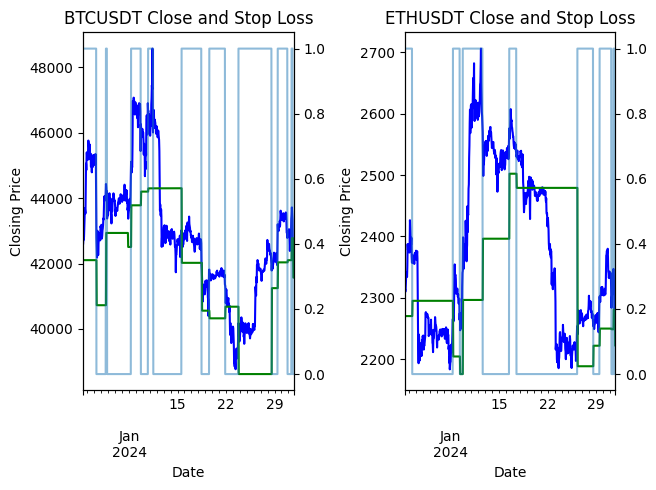

close           creturns                high           \
                      BTCUSDT  ETHUSDT   BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT   
date                                                                            
2024-01-01 09:00:00  42612.24  2300.99  1.003226  1.002387  42715.55  2305.11   
2024-01-01 10:00:00  42783.05  2314.70  1.007247  1.008360  42847.07  2318.34   
2024-01-01 11:00:00  42725.15  2309.89  1.005884  1.006264  42856.00  2319.55   
2024-01-01 12:00:00  42812.70  2313.76  1.007945  1.007950  42824.90  2317.09   
2024-01-01 13:00:00  43111.10  2326.90  1.014970  1.013675  43208.86  2331.77   
...                       ...      ...       ...       ...       ...      ...   
2024-01-31 14:00:00  43334.64  2323.38  1.020233  1.012141  43551.99  2342.26   
2024-01-31 15:00:00  42541.18  2287.98  1.001553  0.996720  43361.10  2324.67   
2024-01-31 16:00:00  42487.12  2279.00  1.000280  0.992808  42707.68  2292.37   
2024-01-31 17:00:00  42656.07  2285.75  1.004258  0.995748  42690.42  2287.94   
2024-01-31 18:00:00  42580.00  2283.14  1.002467  0.994611  42688.88  2288.91   

                    log_return                 low           ...  \
                       BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT  ...   
date                                                         ...   
2024-01-01 09:00:00  -0.002421 -0.001377  42580.00  2294.84  ...   
2024-01-01 10:00:00   0.004000  0.005941  42586.51  2299.20  ...   
2024-01-01 11:00:00  -0.001354 -0.002080  42664.42  2306.53  ...   
2024-01-01 12:00:00   0.002047  0.001674  42704.42  2306.48  ...   
2024-01-01 13:00:00   0.006946  0.005663  42812.70  2313.76  ...   
...                        ...       ...       ...      ...  ...   
2024-01-31 14:00:00  -0.004116 -0.005259  43041.10  2309.51  ...   
2024-01-31 15:00:00  -0.018480 -0.015354  42519.92  2286.11  ...   
2024-01-31 16:00:00  -0.001272 -0.003933  42276.84  2263.57  ...   
2024-01-31 17:00:00   0.003969  0.002957  42381.10  2269.03  ...   
2024-01-31 18:00:00  -0.001785 -0.001143  42555.46  2281.88  ...   

                    session_compound           overall_session_return  \
                             BTCUSDT   ETHUSDT                BTCUSDT   
date                                                                    
2024-01-01 09:00:00         1.000014  0.998892               0.026950   
2024-01-01 10:00:00         1.004031  1.004862               0.026950   
2024-01-01 11:00:00         1.002673  1.002776               0.026950   
2024-01-01 12:00:00         1.004730  1.004457               0.026950   
2024-01-01 13:00:00         1.011757  1.010178               0.026950   
...                              ...       ...                    ...   
2024-01-31 14:00:00         0.996810  0.989848              -0.021276   
2024-01-31 15:00:00         0.978724  0.974881              -0.021276   
2024-01-31 16:00:00         0.978724  0.971062              -0.021276   
2024-01-31 17:00:00         1.000000  0.971062               0.000000   
2024-01-31 18:00:00         1.000000  1.000000               0.000000   

                                      atr                stop_loss  \
                      ETHUSDT     BTCUSDT    ETHUSDT       BTCUSDT   
date                                                                 
2024-01-01 09:00:00  0.023941  169.721566  10.174832  42103.075302   
2024-01-01 10:00:00  0.023941  179.391771  11.129219  42244.874687   
2024-01-01 11:00:00  0.023941  180.645360  11.323691  42183.213919   
2024-01-01 12:00:00  0.023941  174.645737  11.252522  42288.762788   
2024-01-01 13:00:00  0.023941  196.127177  11.907832  42522.718470   
...                       ...         ...        ...           ...   
2024-01-31 14:00:00 -0.028938  324.642171  19.343813  42360.713488   
2024-01-31 15:00:00 -0.028938  361.537730  20.716398  41456.566810   
2024-01-31 16:00:00 -0.028938  366.487892  21.293798  41387.656324   
2024-01-31 17:00:00 -0.028938  362.404471  21.123526  41568.856586   
202

In [301]:
calculate_atr_fixed_sl(for_testing, atr_length = 14, sl_mult = 3, plot = True)

In [302]:
#Make a wrapper class for Atr fixed stop loss where we rerun all functions dependent on the position column (trades, sessions, ...)
#This is to ensure that the trades and sessions are updated with the new stop loss values
def atr_fixed_stop_loss(df, atr_length = 14, sl_mult = 3, plot = True):
    _df = calculate_atr_fixed_sl(df, atr_length = atr_length, sl_mult = sl_mult, plot = plot)
    _df = Calculations().trades(_df)
    _df = Calculations().strategy_returns(_df)
    _df = Calculations().strategy_creturns(_df)
    _df = Calculations().sessions(_df)
    return _df

### Dynamic Indicator Stop Loss (supertrend)

1. For each grouped sessions, make a new column that calculates the supertrend indicator
2. For each session, if any of the low prices goes below the trailing stop -> Make a new position column that indicates a 0 whenever we exit a trade by a stop loss (for the rest of the column).

Note that the process of doing a dynamic indicator stop loss is the same as the fixed stop loss, the only difference is that for each session we don't take the first value, instead we keep using the current values of the indicator

In [303]:
_df = for_testing.copy()
_df = _df.unstack()


In [304]:
#Since this is based on the supertrend indicator, we first check if we have already calculated the indicator, 
# else we would calculate the indicator
sl_str_length = 10
sl_str_mult = 3.0
if not any('SUPERT'.lower() in col.lower() for col in test.columns.get_level_values(0)):
    #Calculate the supertrend indicator
    test = Trend_Following().supertrend_signals(df, sl_str_length, sl_str_mult) #it contains supertrend values as well as signals

#Split the data to remove the warm up period of the indicator
test = test.iloc[str_length:]
test

close           creturns                high           \
                      BTCUSDT  ETHUSDT   BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT   
date                                                                            
2024-01-01 05:00:00  42691.10  2302.04  1.005082  1.002845  42749.36  2303.00   
2024-01-01 06:00:00  42690.20  2304.47  1.005061  1.003903  42762.39  2305.05   
2024-01-01 07:00:00  42648.38  2299.43  1.004076  1.001708  42780.00  2307.24   
2024-01-01 08:00:00  42715.54  2304.16  1.005658  1.003768  42748.00  2308.20   
2024-01-01 09:00:00  42612.24  2300.99  1.003226  1.002387  42715.55  2305.11   
...                       ...      ...       ...       ...       ...      ...   
2024-01-31 14:00:00  43334.64  2323.38  1.020233  1.012141  43551.99  2342.26   
2024-01-31 15:00:00  42541.18  2287.98  1.001553  0.996720  43361.10  2324.67   
2024-01-31 16:00:00  42487.12  2279.00  1.000280  0.992808  42707.68  2292.37   
2024-01-31 17:00:00  42656.07  2285.75  1.004258  0.995748  42690.42  2287.94   
2024-01-31 18:00:00  42580.00  2283.14  1.002467  0.994611  42688.88  2288.91   

                    log_return                 low           ...  \
                       BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT  ...   
date                                                         ...   
2024-01-01 05:00:00   0.000970  0.000974  42628.00  2297.40  ...   
2024-01-01 06:00:00  -0.000021  0.001055  42605.21  2299.00  ...   
2024-01-01 07:00:00  -0.000980 -0.002189  42611.45  2299.04  ...   
2024-01-01 08:00:00   0.001573  0.002055  42612.76  2298.07  ...   
2024-01-01 09:00:00  -0.002421 -0.001377  42580.00  2294.84  ...   
...                        ...       ...       ...      ...  ...   
2024-01-31 14:00:00  -0.004116 -0.005259  43041.10  2309.51  ...   
2024-01-31 15:00:00  -0.018480 -0.015354  42519.92  2286.11  ...   
2024-01-31 16:00:00  -0.001272 -0.003933  42276.84  2263.57  ...   
2024-01-31 17:00:00   0.003969  0.002957  42381.10  2269.03  ...   
2024-01-31 18:00:00  -0.001785 -0.001143  42555.46  2281.88  ...   

                    session_compound           overall_session_return  \
                             BTCUSDT   ETHUSDT                BTCUSDT   
date                                                                    
2024-01-01 05:00:00         1.001860  0.999342               0.026950   
2024-01-01 06:00:00         1.001839  1.000398               0.026950   
2024-01-01 07:00:00         1.000858  0.998212               0.026950   
2024-01-01 08:00:00         1.002436  1.000267               0.026950   
2024-01-01 09:00:00         1.000014  0.998892               0.026950   
...                              ...       ...                    ...   
2024-01-31 14:00:00         0.996810  0.989848              -0.021276   
2024-01-31 15:00:00         0.978724  0.974881              -0.021276   
2024-01-31 16:00:00         0.978724  0.971062              -0.021276   
2024-01-31 17:00:00         1.000000  0.971062               0.000000   
2024-01-31 18:00:00         1.000000  1.000000               0.000000   

                                      atr                stop_loss  \
                      ETHUSDT     BTCUSDT    ETHUSDT       BTCUSDT   
date                                                                 
2024-01-01 05:00:00  0.023941         NaN        NaN           NaN   
2024-01-01 06:00:00  0.023941         NaN        NaN           NaN   
2024-01-01 07:00:00  0.023941         NaN        NaN           NaN   
2024-01-01 08:00:00  0.023941         NaN        NaN           NaN   
2024-01-01 09:00:00  0.023941  169.721566  10.174832  42442.518434   
...                       ...         ...        ...           ...   
2024-01-31 14:00:00 -0.028938  324.642171  19.343813  43009.997829   
2024-01-31 15:00:00 -0.028938  361.537730  20.716398  42179.642270   
2024-01-31 16:00:00 -0.028938  366.487892  21.293798  42120.632108   
2024-01-31 17:00:00 -0.028938  362.404471  21.123526  42293.665529   
202

In [305]:
test

close           creturns                high           \
                      BTCUSDT  ETHUSDT   BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT   
date                                                                            
2024-01-01 05:00:00  42691.10  2302.04  1.005082  1.002845  42749.36  2303.00   
2024-01-01 06:00:00  42690.20  2304.47  1.005061  1.003903  42762.39  2305.05   
2024-01-01 07:00:00  42648.38  2299.43  1.004076  1.001708  42780.00  2307.24   
2024-01-01 08:00:00  42715.54  2304.16  1.005658  1.003768  42748.00  2308.20   
2024-01-01 09:00:00  42612.24  2300.99  1.003226  1.002387  42715.55  2305.11   
...                       ...      ...       ...       ...       ...      ...   
2024-01-31 14:00:00  43334.64  2323.38  1.020233  1.012141  43551.99  2342.26   
2024-01-31 15:00:00  42541.18  2287.98  1.001553  0.996720  43361.10  2324.67   
2024-01-31 16:00:00  42487.12  2279.00  1.000280  0.992808  42707.68  2292.37   
2024-01-31 17:00:00  42656.07  2285.75  1.004258  0.995748  42690.42  2287.94   
2024-01-31 18:00:00  42580.00  2283.14  1.002467  0.994611  42688.88  2288.91   

                    log_return                 low           ...  \
                       BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT  ...   
date                                                         ...   
2024-01-01 05:00:00   0.000970  0.000974  42628.00  2297.40  ...   
2024-01-01 06:00:00  -0.000021  0.001055  42605.21  2299.00  ...   
2024-01-01 07:00:00  -0.000980 -0.002189  42611.45  2299.04  ...   
2024-01-01 08:00:00   0.001573  0.002055  42612.76  2298.07  ...   
2024-01-01 09:00:00  -0.002421 -0.001377  42580.00  2294.84  ...   
...                        ...       ...       ...      ...  ...   
2024-01-31 14:00:00  -0.004116 -0.005259  43041.10  2309.51  ...   
2024-01-31 15:00:00  -0.018480 -0.015354  42519.92  2286.11  ...   
2024-01-31 16:00:00  -0.001272 -0.003933  42276.84  2263.57  ...   
2024-01-31 17:00:00   0.003969  0.002957  42381.10  2269.03  ...   
2024-01-31 18:00:00  -0.001785 -0.001143  42555.46  2281.88  ...   

                    session_compound           overall_session_return  \
                             BTCUSDT   ETHUSDT                BTCUSDT   
date                                                                    
2024-01-01 05:00:00         1.001860  0.999342               0.026950   
2024-01-01 06:00:00         1.001839  1.000398               0.026950   
2024-01-01 07:00:00         1.000858  0.998212               0.026950   
2024-01-01 08:00:00         1.002436  1.000267               0.026950   
2024-01-01 09:00:00         1.000014  0.998892               0.026950   
...                              ...       ...                    ...   
2024-01-31 14:00:00         0.996810  0.989848              -0.021276   
2024-01-31 15:00:00         0.978724  0.974881              -0.021276   
2024-01-31 16:00:00         0.978724  0.971062              -0.021276   
2024-01-31 17:00:00         1.000000  0.971062               0.000000   
2024-01-31 18:00:00         1.000000  1.000000               0.000000   

                                      atr                stop_loss  \
                      ETHUSDT     BTCUSDT    ETHUSDT       BTCUSDT   
date                                                                 
2024-01-01 05:00:00  0.023941         NaN        NaN           NaN   
2024-01-01 06:00:00  0.023941         NaN        NaN           NaN   
2024-01-01 07:00:00  0.023941         NaN        NaN           NaN   
2024-01-01 08:00:00  0.023941         NaN        NaN           NaN   
2024-01-01 09:00:00  0.023941  169.721566  10.174832  42442.518434   
...                       ...         ...        ...           ...   
2024-01-31 14:00:00 -0.028938  324.642171  19.343813  43009.997829   
2024-01-31 15:00:00 -0.028938  361.537730  20.716398  42179.642270   
2024-01-31 16:00:00 -0.028938  366.487892  21.293798  42120.632108   
2024-01-31 17:00:00 -0.028938  362.404471  21.123526  42293.665529   
202

In [306]:
#Now for each session 
#Calculate the session stop loss
for coin in test.columns.levels[1]:
    #each of the following three do the same, just showing different ways to implement them, useful for reference on future changes if needed 
    test['session_stop_loss', coin] = test[f'SUPERTl_{sl_str_length}_{sl_str_mult}', coin].groupby(test['session', coin]).apply(lambda x: x).reset_index(level=0, drop=True)
    test['session_stop_loss', coin] = test[f'SUPERTl_{sl_str_length}_{sl_str_mult}', coin].groupby(test['session', coin]).transform(lambda x: x)
    test['session_stop_loss', coin] = test[f'SUPERTl_{sl_str_length}_{sl_str_mult}', coin]

test['session_stop_loss']


C:\Users\yassi\AppData\Local\Temp\ipykernel_12576\3532459029.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['session_stop_loss', coin] = test[f'SUPERTl_{sl_str_length}_{sl_str_mult}', coin].groupby(test['session', coin]).apply(lambda x: x).reset_index(level=0, drop=True)
C:\Users\yassi\AppData\Local\Temp\ipykernel_12576\3532459029.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['session_stop_loss', coin] = test[f'SUPERTl_{sl_str_length}_{sl_str_mult}', coin].groupby(test['session', coin])

,BTCUSDT,ETHUSDT
date,,
2024-01-01 05:00:00,42151.624639,2267.771811
2024-01-01 06:00:00,42156.292347,2271.677605
2024-01-01 07:00:00,42171.263411,2273.593557
2024-01-01 08:00:00,42171.839496,2273.593557
2024-01-01 09:00:00,42171.839496,2273.593557
...,...,...
2024-01-31 14:00:00,42638.274929,2287.078390
2024-01-31 15:00:00,NaN,2287.078390
2024-01-31 16:00:00,NaN,NaN


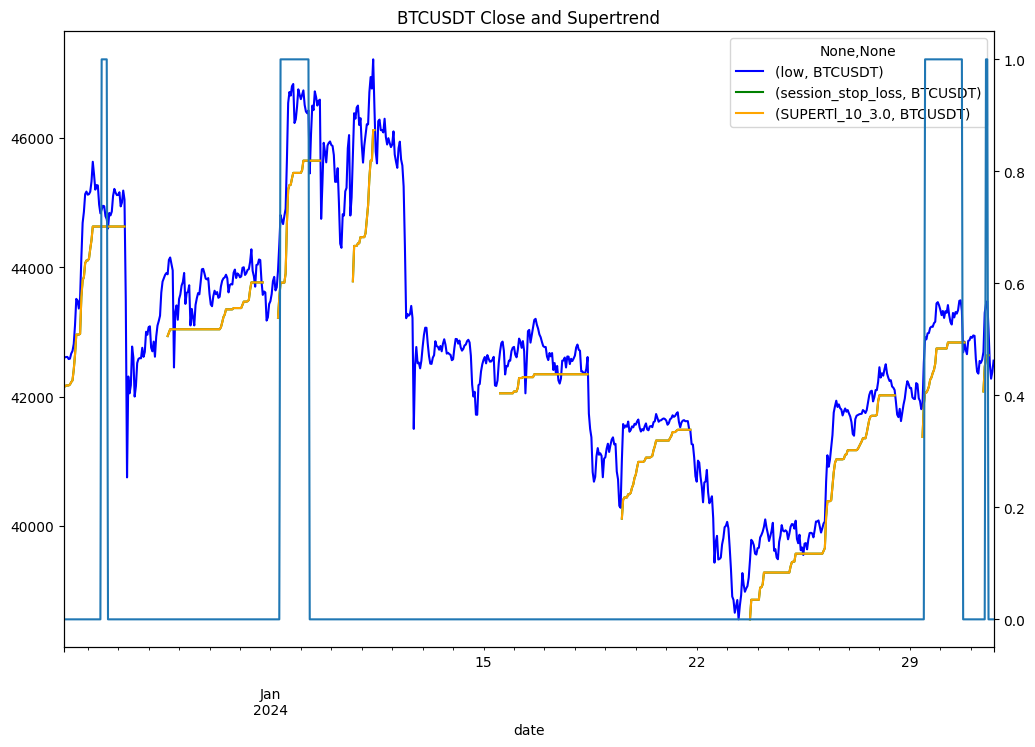

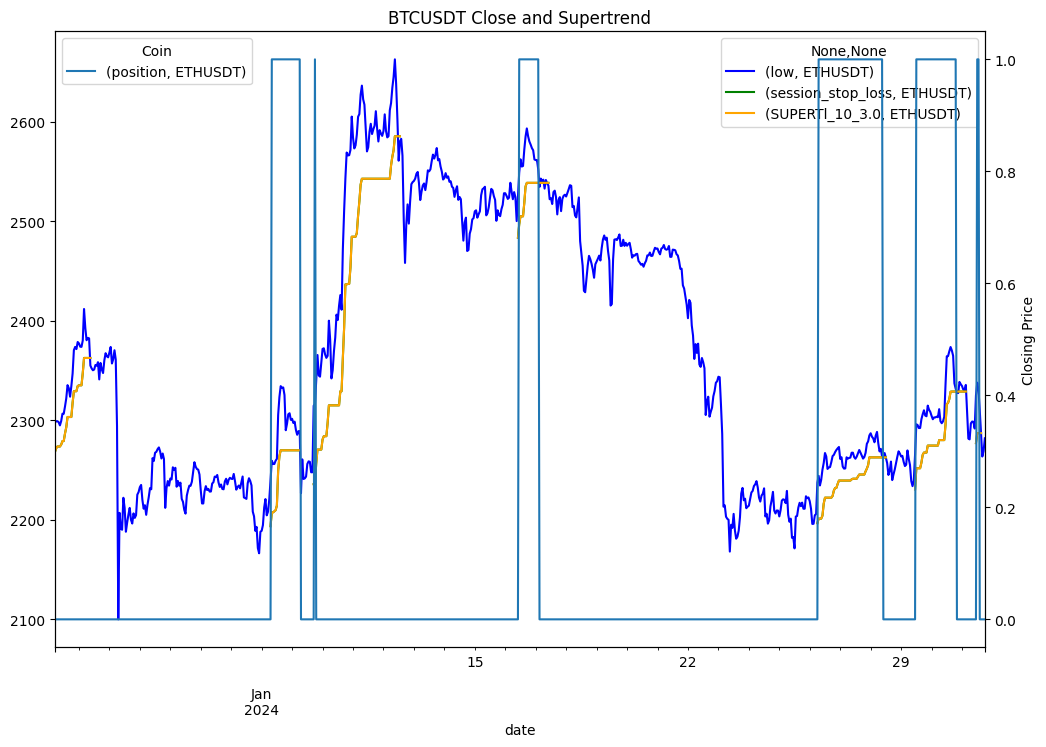

In [307]:
#Apply the inner function to the dataframe
for coin in test.columns.levels[1]:
    # Group by both the session and coin, then pass the coin as an additional argument
    test = test.groupby(test['session', coin], group_keys=False).apply(lambda group: define_sl_pos(group, coin))

for coin in test.columns.get_level_values(1).unique():
    ax = test[[['low', coin], ['session_stop_loss', coin], ['SUPERTl_10_3.0', coin]]].plot(figsize=(12, 8), title = 'BTCUSDT Close and Supertrend', color = ['blue', 'green', 'orange'])
    ax2 = ax.twinx()
    test['position', coin].plot(ax = ax2)
    
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(title='Coin');


Putting all together:

In [308]:
#Note: we are going to use the same define_sl_pos() and plot_sl() as before

def calculate_trailing_sl(df, sl_type = 'supertrend', plot = True, sl_str_length = 10, sl_str_mult = 3.0, sl_percentage = 0, sl_dollar = 0.0):
    """
    
    """
    _df = df.copy().unstack()

    if sl_type.lower() == 'supertrend':
        if not any('SUPERT'.lower() in col.lower() for col in _df.columns.get_level_values(0)):
            #Calculate the supertrend indicator
            _df = Trend_Following().supertrend_signals(_df, sl_str_length, sl_str_mult) #it contains supertrend values as well as signals
            #Slice the data to remove the warm up period of the indicator
            _df = _df.iloc[sl_str_length:]
        
        #In all cases, rename the supertrend long column to be used as a stop loss
        for coin in _df.columns.levels[1]:
            _df['stop_loss', coin] = _df[f'SUPERTl_{sl_str_length}_{float(sl_str_mult)}', coin]  

    elif sl_type.lower() == 'percent':
        _df['stop_loss'] = _df['close'] * (1 - sl_percentage)

    elif sl_type.lower() == 'dollar':
        _df['stop_loss'] = _df['close'] - sl_dollar

    for coin in _df.columns.levels[1]:
        _df['session_stop_loss', coin] = _df['stop_loss', coin].groupby(_df['session', coin]).transform(lambda x: x)

        # Group by both the session and coin, then pass the coin as an additional argument
        _df = _df.groupby(_df['session', coin], group_keys=False).apply(lambda group: define_sl_pos(group, coin))

    if plot:
        plot_sl(_df)

    _df = _df.stack(future_stack= True)

    return _df

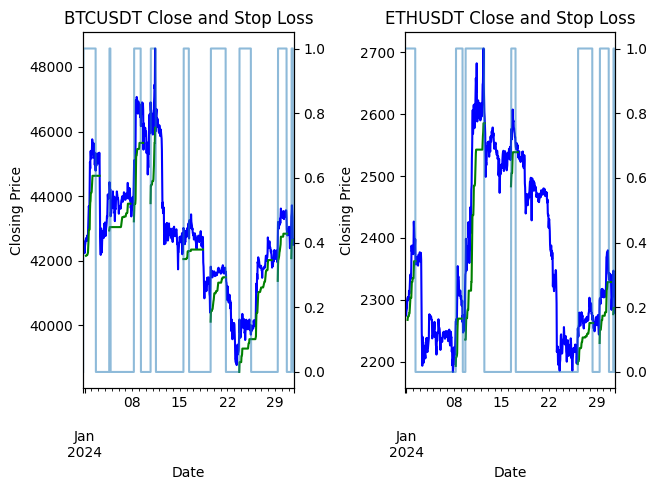

close  creturns      high  log_return  \
date                                                                    
2023-12-31 19:00:00 BTCUSDT  42475.23       NaN  42554.57         NaN   
                    ETHUSDT   2295.51       NaN   2297.18         NaN   
2023-12-31 20:00:00 BTCUSDT  42613.56  1.003257  42775.00    0.003251   
                    ETHUSDT   2303.72  1.003577   2306.60    0.003570   
2023-12-31 21:00:00 BTCUSDT  42581.10  1.002493  42638.41   -0.000762   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open   returns       volume  \
date                                                                     
2023-12-31 19:00:00 BTCUSDT  42261.02  42283.58       NaN   1271.68108   
                    ETHUSDT   2281.27   2281.87       NaN  10771.91830   
2023-12-31 20:00:00 BTCUSDT  42431.65  42475.23  0.003257   1196.37856   
                    ETHUSDT   2292.90   2295.52  0.003577   8413.42600   
2023-12-31 21:00:00 BTCUSDT  42500.00  42613.57 -0.000762    685.21980   
...                               ...       ...       ...          ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98 -0.003925  23011.28190   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  0.003976   1398.31850   
                    ETHUSDT   2269.03   2278.99  0.002962  10362.16650   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07 -0.001783   1257.92790   
                    ETHUSDT   2281.88   2285.75 -0.001142   9636.50420   

                             volume_in_dollars  volume_flag  ...  \
date                                                         ...   
2023-12-31 19:00:00 BTCUSDT       5.401495e+07            1  ...   
                    ETHUSDT       2.472705e+07            1  ...   
2023-12-31 20:00:00 BTCUSDT       5.098195e+07            1  ...   
                    ETHUSDT       1.938218e+07            1  ...   
2023-12-31 21:00:00 BTCUSDT       2.917741e+07            1  ...   
...                                        ...          ...  ...   
2024-01-31 16:00:00 ETHUSDT       5.244271e+07            1  ...   
2024-01-31 17:00:00 BTCUSDT       5.964677e+07            1  ...   
                    ETHUSDT       2.368532e+07            1  ...   
2024-01-31 18:00:00 BTCUSDT       5.356257e+07            1  ...   
                    ETHUSDT       2.200149e+07            1  ...   

                             SUPERTl_10_3.0  SUPERTs_10_3.0  position  trades  \
date                                                                            
2023-12-31 19:00:00 BTCUSDT             NaN             NaN       0.0     0.0   
                    ETHUSDT             NaN             NaN       0.0     0.0   
2023-12-31 20:00:00 BTCUSDT             NaN             NaN       1.0     1.0   
                    ETHUSDT             NaN             NaN       1.0     1.0   
2023-12-31 21:00:00 BTCUSDT             NaN             NaN       1.0     0.0   
...                                     ...             ...       ...     ...   
2024-01-31 16:00:00 ETHUSDT             NaN     2346.264505       0.0     0.0   
2024-01-31 17:00:00 BTCUSDT             NaN    43680.887427       0.0     0.0   
                    ETHUSDT             NaN     2345.623055       0.0     1.0   
2024-01-31 18:00:00 BTCUSDT             NaN    43680.887427       0.0     0.0   
                    ETHUSDT             NaN     2345.623055       0.0     0.0   

                             strategy  session  session_compound  \
date                                                               
2023-12-31 19:00:00 BTCUSDT       NaN      0

In [309]:
calculate_trailing_sl(for_testing)

In [310]:
import requests
import json
import math
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from qgridnext import show_grid
from datetime import datetime, timedelta
import sys  
import os
import pandas_ta as ta


# Ensure the directories are in the system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Data_Management')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Universe_Selection')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Signal_Generation')))

# Import the modules
from data import Data
from calculations import Calculations
from coarse import Coarse_1 as Coarse
from fine import Fine_1 as Fine
from entry_signal import Trend_Following, Mean_Reversion

class Stop_Loss():

    def __init__(self, df: pd.DataFrame,
                 sl_type = 'atr', 
                 indicator_length = 0.0, 
                 sl_mult = 0.0, 
                 sl_percentage = 0.0, 
                 sl_dollar = 0.0,
                 exit_percent = 1.0):
        """
        Parameter:
            sl_type: string
                can be: supertrend, atr, dollar, percent
            
            exit_amount: float
                amount to subtract from position (represents percentage to be sold when stop loss is executed).
                useful for partial stop losses.

        Indicators currently implemented: 
            Supertrend (for Dynamic SL)
            ATR (for fixed SL)
        """
        self.df = df
        self.indicator_length = indicator_length
        self.sl_mult = sl_mult
        self.sl_percentage = sl_percentage
        self.sl_dollar = sl_dollar
        self.sl_type = sl_type
        self.exit_percent = exit_percent

    def define_sl_pos(self, group, coin):
        if (group['low', coin] <= group['session_stop_loss', coin]).any():
            start = group[group['low', coin] <= group['session_stop_loss', coin]].index[0]
            stop = group.index[-2]
            group.loc[start:stop, ("position", coin)] = 1 - self.exit_percent
            return group
        else:
            return group
            
    def plot_sl(self, df):
        """
        Takes an unstacked dataframe with the following columns:
        - close
        - session_stop_loss
        """
        
        _df = df.copy().unstack()
        # Get unique coins
        unique_coins = _df.columns.get_level_values(1).unique()

        # Determine grid dimensions
        num_coins = len(unique_coins)
        cols = 5 # You can choose the number of columns
        rows = math.ceil(num_coins / cols)

        # Create the subplots grid
        fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, rows * 5))

        # Flatten the axes array for easy iteration
        axes = axes.flatten() #this makes the axes a 1D array, so we can iterate over it without going for another loop

        # Plot each coin
        for i, coin in enumerate(unique_coins):
            ax = _df[[['low', coin], ['session_stop_loss', coin]]].plot(
                ax=axes[i],
                title=f'{coin} Close and Stop Loss',
                color=['blue', 'green'],
                legend = None
            )
            axes[i].set_xlabel('Date')
            axes[i].set_ylabel('Closing Price')
            # axes[i].legend(title='Coin')
            ax2 = ax.twinx()
            _df['position', coin].plot(ax = ax2, alpha = 0.5)
            

        # Remove any unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        # Adjust layout
        plt.tight_layout()
        plt.show()

    def calculate_fixed_sl(self):
        """
        This function applies a fixed stop loss to the position column in the dataframe.
        Returns a stacked DataFrame.

        Parameters:
            plot: boolean
                will plot the closing prices, position, as well as each of the session losses for each coin  
        """

        _df = self.df.copy()

        #Calculate the ATR indicator
        if self.sl_type.lower() == 'supertrend':
            raise ValueError("Fixed stop loss does not currently support the supertrend indicator, use Dynamic Stop Loss")
        elif self.sl_type.lower() == 'atr':
            #unstack dataframe
            _df = _df.copy().unstack()
            if not any('atr'.lower() in col.lower() for col in _df.columns.get_level_values(0)):
                #Calculate the ATR indicator
                for coin in _df.columns.levels[1]:
                    high, low, close = _df['high', coin], _df['low', coin], _df['close', coin]
                    _df['atr', coin] = ta.atr(high, low, close, length=self.indicator_length)

                _df = _df.iloc[self.indicator_length:] #Slice the dataframe to remove the NaN values from the ATR calculation
                #It is better to do the above as we might get NaN values in other columns, so this might remove many needed rows
                #Note: This is done at this first stage right after we calculate all the indicators, We need to create a function in the 
                    #future to remove the largest length needed for the calculations as this would be essential to warm up the data needed.
            
            #Calculate the stop loss
            _df = _df.stack(future_stack = True)
            _df['stop_loss'] = _df['close'] - self.sl_mult * _df['atr']

        elif self.sl_type.lower() == 'percent':
            _df['stop_loss'] = _df['close'] * (1 - self.sl_percentage)

        elif self.sl_type.lower() == 'dollar':
            _df['stop_loss'] = _df['close'] - self.sl_dollar


        ####Everything that comes after this is common for all fixed stop losses (percentage, dollar, indicator based, ...)#####

        #Unstack the dataframe
        _df = _df.unstack()

        #Calculate the session stop loss
        for coin in _df.columns.levels[1]:
            _df['session_stop_loss', coin] = _df['stop_loss', coin].groupby(_df['session', coin]).transform('first')
            # Group by both the session and coin, then pass the coin as an additional argument
            _df = _df.groupby(_df['session', coin], group_keys=False).apply(lambda group: self.define_sl_pos(group, coin))

        #Stack the dataframe
        _df = _df.stack(future_stack=True)

        #Redefine the class parameter
        self.df = _df

        return _df
    
    #Note: we are going to use the same define_sl_pos() and plot_sl() as before

    def calculate_dynamic_sl(self):
        """
        This function applies a dynamic stop loss to the position column in the dataframe.
        Returns a stacked DataFrame.

        Parameters:
            plot: boolean
                will plot the closing prices, position, as well as each of the session losses for each coin  
        """

        _df = self.df.copy()
        if self.sl_type.lower() == 'atr':
            raise ValueError('Dynamic stop loss does not currently support the ATR indicator, use Fixed Stop Loss')
            
        elif self.sl_type.lower() == 'supertrend':
            _df = _df.unstack()
            if not any('SUPERT'.lower() in col.lower() for col in _df.columns.get_level_values(0)):
                #Calculate the supertrend indicator
                _df = Trend_Following().supertrend_signals(_df, self.indicator_length, self.sl_mult) #it contains supertrend values as well as signals
                #Slice the data to remove the warm up period of the indicator
                _df = _df.iloc[self.indicator_length:]
            
            #In all cases, rename the supertrend long column to be used as a stop loss
            for coin in _df.columns.levels[1]:
                _df['stop_loss', coin] = _df[f'SUPERTl_{self.indicator_length}_{float(self.sl_mult)}', coin] 

            _df = _df.stack(future_stack = True) 

        elif self.sl_type.lower() == 'percent':
            _df['stop_loss'] = _df['close'] * (1 - self.sl_percentage)

        elif self.sl_type.lower() == 'dollar':
            _df['stop_loss'] = _df['close'] - self.sl_dollar


        _df = _df.unstack()
        for coin in _df.columns.levels[1]:
            _df['session_stop_loss', coin] = _df['stop_loss', coin].groupby(_df['session', coin]).transform(lambda x: x)
            # Group by both the session and coin, then pass the coin as an additional argument
            _df = _df.groupby(_df['session', coin], group_keys=False).apply(lambda group: self.define_sl_pos(group, coin))

        _df = _df.stack(future_stack= True)

        return _df
        
    
    def apply_stop_loss(self, fixed = True, plot = True):
        """ 
        This function applies the stop loss to the dataframe and calculates the trades, strategy returns, strategy cumulative returns, and sessions.
        it acts as a wrapper for the calculate_fixed_sl function, and make the necessary adjustments after that position column has changed

        Parameters:
            fixed: Boolean
                specifies if the stop loss will be fixed (True) or dynamic (False).
                This is essential if we are using sl_type of percent or dollar.
        """
        
        _df = self.calculate_fixed_sl() if fixed else self.calculate_dynamic_sl()
        if plot:
            self.plot_sl(_df)
        _df = Calculations().trades(_df)
        _df = Calculations().strategy_returns(_df)
        _df = Calculations().strategy_creturns(_df)
        _df = Calculations().sessions(_df)
        return _df

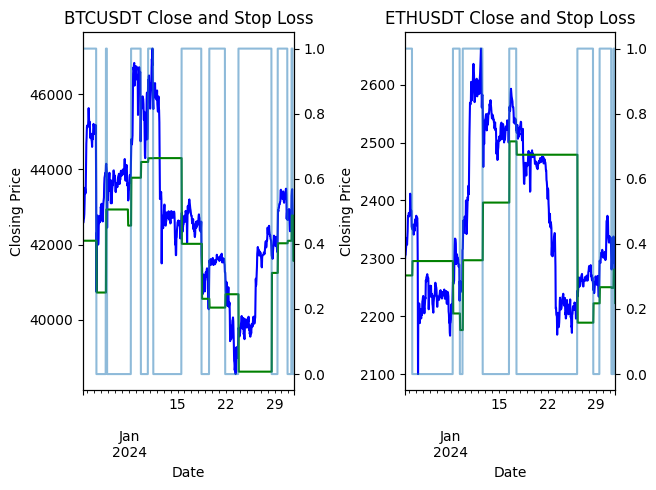

close  creturns      high  log_return  \
date                                                                    
2024-01-01 09:00:00 BTCUSDT  42612.24  1.003226  42715.55   -0.002421   
                    ETHUSDT   2300.99  1.002387   2305.11   -0.001377   
2024-01-01 10:00:00 BTCUSDT  42783.05  1.007247  42847.07    0.004000   
                    ETHUSDT   2314.70  1.008360   2318.34    0.005941   
2024-01-01 11:00:00 BTCUSDT  42725.15  1.005884  42856.00   -0.001354   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open   returns       volume  \
date                                                                     
2024-01-01 09:00:00 BTCUSDT  42580.00  42715.54 -0.002418    711.01152   
                    ETHUSDT   2294.84   2304.16 -0.001376   7316.25750   
2024-01-01 10:00:00 BTCUSDT  42586.51  42612.24  0.004008    942.70163   
                    ETHUSDT   2299.20   2300.99  0.005958  12303.53440   
2024-01-01 11:00:00 BTCUSDT  42664.42  42783.05 -0.001353    918.71056   
...                               ...       ...       ...          ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98 -0.003925  23011.28190   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  0.003976   1398.31850   
                    ETHUSDT   2269.03   2278.99  0.002962  10362.16650   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07 -0.001783   1257.92790   
                    ETHUSDT   2281.88   2285.75 -0.001142   9636.50420   

                             volume_in_dollars  volume_flag  ...  trades  \
date                                                         ...           
2024-01-01 09:00:00 BTCUSDT       3.029779e+07            1  ...     0.0   
                    ETHUSDT       1.683464e+07            1  ...     0.0   
2024-01-01 10:00:00 BTCUSDT       4.033165e+07            1  ...     0.0   
                    ETHUSDT       2.847899e+07            1  ...     0.0   
2024-01-01 11:00:00 BTCUSDT       3.925205e+07            1  ...     0.0   
...                                        ...          ...  ...     ...   
2024-01-31 16:00:00 ETHUSDT       5.244271e+07            1  ...     1.0   
2024-01-31 17:00:00 BTCUSDT       5.964677e+07            1  ...     0.0   
                    ETHUSDT       2.368532e+07            1  ...     0.0   
2024-01-31 18:00:00 BTCUSDT       5.356257e+07            1  ...     0.0   
                    ETHUSDT       2.200149e+07            1  ...     0.0   

                             strategy  session  session_compound  \
date                                                               
2024-01-01 09:00:00 BTCUSDT -0.002418      0.0          0.997585   
                    ETHUSDT -0.001376      0.0          0.998625   
2024-01-01 10:00:00 BTCUSDT  0.004008      0.0          1.001591   
                    ETHUSDT  0.005958      0.0          1.004593   
2024-01-01 11:00:00 BTCUSDT -0.001353      0.0          1.000237   
...                               ...      ...               ...   
2024-01-31 16:00:00 ETHUSDT -0.000000     12.0          0.974881   
2024-01-31 17:00:00 BTCUSDT  0.000000     17.0          1.000000   
                    ETHUSDT  0.000000     13.0          1.000000   
2024-01-31 18:00:00 BTCUSDT -0.000000     17.0          1.000000   
                    ETHUSDT -0.000000     13.0          1.000000   

                             overall_session_return         atr     stop_loss  \
date                                                                            
2024-01-01 09:00:00 BTCUSDT                0.024455  169.721566  42103.075302   
  

In [311]:
stop_loss = Stop_Loss(for_testing, 'atr', 14, 3)
stop_loss.apply_stop_loss(fixed = True, plot = True)

---

## Take Profit

### Fixed Take Profit

Logic:

The logic really resembles the one of the stop loss.

For a fixed take profit based on a stop loss, that is a multiple of a stop loss: 

1. Calculate take profit = close + mult * (close - stop loss)
2. Get the take profit level at the beginning of each session\
-> Note that we need get the level at the beginning of each session, because if the stop loss is dynamic, then our take profit would also be dynamic (and never get hit)
3. Apply changes to position column (when high > take profit)


For a fixed take profit (based on an indicator, dollar or percent), independant of stop loss:

1. Calculate indicator -> Remove warm up data (if needed) -> Calculate take profit level (if it has to be added to the entry price (usually the close), otherwise just define it as the take profit column)
2. Get the take profit level at the beginning of each session
3. Apply changes to position column (when high > take profit)


For a dynamic take profit (based on an indicator, dollar or percent):

1. Calculate the indicator -> remove warm up data (if needed) -> Calculate take profit level (if it has to be added to the entry price (usually the close), otherwise just define it as the take profit column)
2. Get the current cummin of the take profit level for each session\
-> Basically we want each time price goes up to keep the same tp level, otherwise (when it goes down) to lower the tp level.
3. Apply changes to position column (when high > take profit)


Wrapper method:

1. Applies Take profit
2. Adjust other columns (strategy returns, ...)

#### Fixed TP based on Stop Loss

In [312]:
exit_percent = 1
def define_tp_pos(group, coin):
    if (group['high', coin] >= group['session_take_profit', coin]).any():
        start = group[group['high', coin] >= group['session_take_profit', coin]].index[0]
        stop = group.index[-2]
        group.loc[start:stop, ("position", coin)] = 1 - exit_percent
        return group
    else:
        return group

In [313]:
#Check if we have a stop loss column
stop_loss = Stop_Loss(for_testing, 'atr', 14, 3)
test = stop_loss.apply_stop_loss(fixed = True, plot = False)

if not any('stop_loss' in col for col in test.columns.get_level_values(0)):
    raise ValueError('No stop loss column found in the dataframe, add a stop loss to add this type of take profit')

In [314]:
test['position'].value_counts()

position
0.0    837
1.0    623
Name: count, dtype: int64

In [315]:
test

close  creturns      high  log_return  \
date                                                                    
2024-01-01 09:00:00 BTCUSDT  42612.24  1.003226  42715.55   -0.002421   
                    ETHUSDT   2300.99  1.002387   2305.11   -0.001377   
2024-01-01 10:00:00 BTCUSDT  42783.05  1.007247  42847.07    0.004000   
                    ETHUSDT   2314.70  1.008360   2318.34    0.005941   
2024-01-01 11:00:00 BTCUSDT  42725.15  1.005884  42856.00   -0.001354   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open   returns       volume  \
date                                                                     
2024-01-01 09:00:00 BTCUSDT  42580.00  42715.54 -0.002418    711.01152   
                    ETHUSDT   2294.84   2304.16 -0.001376   7316.25750   
2024-01-01 10:00:00 BTCUSDT  42586.51  42612.24  0.004008    942.70163   
                    ETHUSDT   2299.20   2300.99  0.005958  12303.53440   
2024-01-01 11:00:00 BTCUSDT  42664.42  42783.05 -0.001353    918.71056   
...                               ...       ...       ...          ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98 -0.003925  23011.28190   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  0.003976   1398.31850   
                    ETHUSDT   2269.03   2278.99  0.002962  10362.16650   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07 -0.001783   1257.92790   
                    ETHUSDT   2281.88   2285.75 -0.001142   9636.50420   

                             volume_in_dollars  volume_flag  ...  trades  \
date                                                         ...           
2024-01-01 09:00:00 BTCUSDT       3.029779e+07            1  ...     0.0   
                    ETHUSDT       1.683464e+07            1  ...     0.0   
2024-01-01 10:00:00 BTCUSDT       4.033165e+07            1  ...     0.0   
                    ETHUSDT       2.847899e+07            1  ...     0.0   
2024-01-01 11:00:00 BTCUSDT       3.925205e+07            1  ...     0.0   
...                                        ...          ...  ...     ...   
2024-01-31 16:00:00 ETHUSDT       5.244271e+07            1  ...     1.0   
2024-01-31 17:00:00 BTCUSDT       5.964677e+07            1  ...     0.0   
                    ETHUSDT       2.368532e+07            1  ...     0.0   
2024-01-31 18:00:00 BTCUSDT       5.356257e+07            1  ...     0.0   
                    ETHUSDT       2.200149e+07            1  ...     0.0   

                             strategy  session  session_compound  \
date                                                               
2024-01-01 09:00:00 BTCUSDT -0.002418      0.0          0.997585   
                    ETHUSDT -0.001376      0.0          0.998625   
2024-01-01 10:00:00 BTCUSDT  0.004008      0.0          1.001591   
                    ETHUSDT  0.005958      0.0          1.004593   
2024-01-01 11:00:00 BTCUSDT -0.001353      0.0          1.000237   
...                               ...      ...               ...   
2024-01-31 16:00:00 ETHUSDT -0.000000     12.0          0.974881   
2024-01-31 17:00:00 BTCUSDT  0.000000     17.0          1.000000   
                    ETHUSDT  0.000000     13.0          1.000000   
2024-01-31 18:00:00 BTCUSDT -0.000000     17.0          1.000000   
                    ETHUSDT -0.000000     13.0          1.000000   

                             overall_session_return         atr     stop_loss  \
date                                                                            
2024-01-01 09:00:00 BTCUSDT                0.024455  169.721566  42103.075302   
  

<Axes: xlabel='date'>

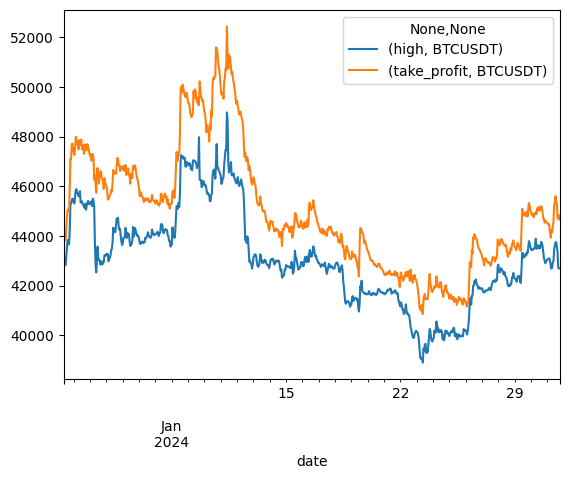

In [316]:
#Calculate the take profit level
test = test.unstack()
tp_mult = 2
for coin in test.columns.levels[1]:
    test['take_profit', coin] = test['close', coin] + tp_mult * (test['close', coin] - test['stop_loss', coin])
test[[['high', 'BTCUSDT'], ['take_profit', 'BTCUSDT']]].plot()

In [317]:
test

close           creturns                high           \
                      BTCUSDT  ETHUSDT   BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT   
date                                                                            
2024-01-01 09:00:00  42612.24  2300.99  1.003226  1.002387  42715.55  2305.11   
2024-01-01 10:00:00  42783.05  2314.70  1.007247  1.008360  42847.07  2318.34   
2024-01-01 11:00:00  42725.15  2309.89  1.005884  1.006264  42856.00  2319.55   
2024-01-01 12:00:00  42812.70  2313.76  1.007945  1.007950  42824.90  2317.09   
2024-01-01 13:00:00  43111.10  2326.90  1.014970  1.013675  43208.86  2331.77   
...                       ...      ...       ...       ...       ...      ...   
2024-01-31 14:00:00  43334.64  2323.38  1.020233  1.012141  43551.99  2342.26   
2024-01-31 15:00:00  42541.18  2287.98  1.001553  0.996720  43361.10  2324.67   
2024-01-31 16:00:00  42487.12  2279.00  1.000280  0.992808  42707.68  2292.37   
2024-01-31 17:00:00  42656.07  2285.75  1.004258  0.995748  42690.42  2287.94   
2024-01-31 18:00:00  42580.00  2283.14  1.002467  0.994611  42688.88  2288.91   

                    log_return                 low           ...  \
                       BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT  ...   
date                                                         ...   
2024-01-01 09:00:00  -0.002421 -0.001377  42580.00  2294.84  ...   
2024-01-01 10:00:00   0.004000  0.005941  42586.51  2299.20  ...   
2024-01-01 11:00:00  -0.001354 -0.002080  42664.42  2306.53  ...   
2024-01-01 12:00:00   0.002047  0.001674  42704.42  2306.48  ...   
2024-01-01 13:00:00   0.006946  0.005663  42812.70  2313.76  ...   
...                        ...       ...       ...      ...  ...   
2024-01-31 14:00:00  -0.004116 -0.005259  43041.10  2309.51  ...   
2024-01-31 15:00:00  -0.018480 -0.015354  42519.92  2286.11  ...   
2024-01-31 16:00:00  -0.001272 -0.003933  42276.84  2263.57  ...   
2024-01-31 17:00:00   0.003969  0.002957  42381.10  2269.03  ...   
2024-01-31 18:00:00  -0.001785 -0.001143  42555.46  2281.88  ...   

                        stop_loss              session_stop_loss               \
                          BTCUSDT      ETHUSDT           BTCUSDT      ETHUSDT   
date                                                                            
2024-01-01 09:00:00  42103.075302  2270.465503      42103.075302  2270.465503   
2024-01-01 10:00:00  42244.874687  2281.312342      42103.075302  2270.465503   
2024-01-01 11:00:00  42183.213919  2275.918928      42103.075302  2270.465503   
2024-01-01 12:00:00  42288.762788  2280.002433      42103.075302  2270.465503   
2024-01-01 13:00:00  42522.718470  2291.176505      42103.075302  2270.465503   
...                           ...          ...               ...          ...   
2024-01-31 14:00:00  42360.713488  2265.348562      42775.016353  2280.692297   
2024-01-31 15:00:00  41456.566810  2225.830807      42775.016353  2280.692297   
2024-01-31 16:00:00  41387.656324  2215.118607      42775.016353  2280.692297   
2024-01-31 17:00:00  41568.856586  2222.379421      41568.856586  2280.692297   
2024-01-31 18:00:00  41541.854687  2222.789462      41568.856586  2222.789462   

                      trade         cstrategy             take_profit  \
                    BTCUSDT ETHUSDT   BTCUSDT   ETHUSDT       BTCUSDT   
date                                                                    
2024-01-01 09:00:00     1.0     1.0  0.997585  0.998625  43630.569396   
2024-01-01 10:00:00     NaN     NaN  1.001591  1.004593  43859.400627   
2024-01-01 11:00:00     NaN     NaN  1.000237  1.002508  43809.022161   
2024-01-01 12:00:00     NaN     NaN  1.002289  1.004189  43860.574424   
2024-01-01 13:00:00     NaN     NaN  1.009299  1.009908  44287.863060   
...                     ...     ...       ...       ...           ...   
2024-01-31 14:00:00     NaN     NaN  1.064888  1.123009  45282.493025   
2024-01-31 15:00:00     NaN     NaN  1.064888  1.106028  44710.406380  

In [318]:
test['position'].value_counts()

BTCUSDT  ETHUSDT
0.0      0.0        291
1.0      0.0        195
         1.0        184
0.0      1.0         60
Name: count, dtype: int64

<Axes: xlabel='date'>

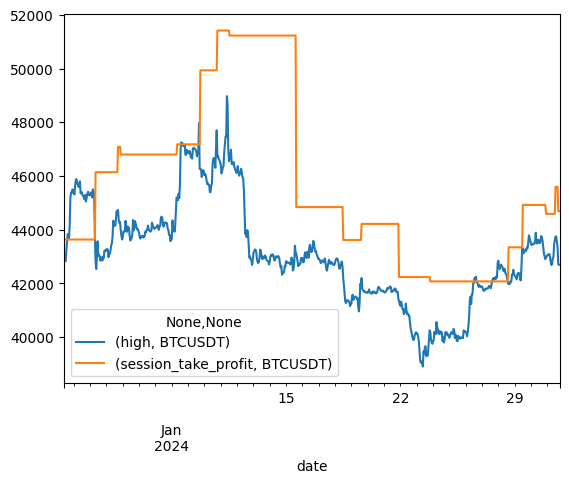

In [319]:
#Calculate the session take profit
for coin in test.columns.get_level_values(1):
    test['session_take_profit', coin] = test['take_profit', coin].groupby(test['session', coin]).transform('first')

    #Define the take profit position
    test = test.groupby(test['session', coin], group_keys=False).apply(lambda group: define_tp_pos(group, coin))

test[[['high', 'BTCUSDT'], ['session_take_profit', 'BTCUSDT']]].plot()

In [320]:
test

close           creturns                high           \
                      BTCUSDT  ETHUSDT   BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT   
date                                                                            
2024-01-01 09:00:00  42612.24  2300.99  1.003226  1.002387  42715.55  2305.11   
2024-01-01 10:00:00  42783.05  2314.70  1.007247  1.008360  42847.07  2318.34   
2024-01-01 11:00:00  42725.15  2309.89  1.005884  1.006264  42856.00  2319.55   
2024-01-01 12:00:00  42812.70  2313.76  1.007945  1.007950  42824.90  2317.09   
2024-01-01 13:00:00  43111.10  2326.90  1.014970  1.013675  43208.86  2331.77   
...                       ...      ...       ...       ...       ...      ...   
2024-01-31 14:00:00  43334.64  2323.38  1.020233  1.012141  43551.99  2342.26   
2024-01-31 15:00:00  42541.18  2287.98  1.001553  0.996720  43361.10  2324.67   
2024-01-31 16:00:00  42487.12  2279.00  1.000280  0.992808  42707.68  2292.37   
2024-01-31 17:00:00  42656.07  2285.75  1.004258  0.995748  42690.42  2287.94   
2024-01-31 18:00:00  42580.00  2283.14  1.002467  0.994611  42688.88  2288.91   

                    log_return                 low           ...  \
                       BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT  ...   
date                                                         ...   
2024-01-01 09:00:00  -0.002421 -0.001377  42580.00  2294.84  ...   
2024-01-01 10:00:00   0.004000  0.005941  42586.51  2299.20  ...   
2024-01-01 11:00:00  -0.001354 -0.002080  42664.42  2306.53  ...   
2024-01-01 12:00:00   0.002047  0.001674  42704.42  2306.48  ...   
2024-01-01 13:00:00   0.006946  0.005663  42812.70  2313.76  ...   
...                        ...       ...       ...      ...  ...   
2024-01-31 14:00:00  -0.004116 -0.005259  43041.10  2309.51  ...   
2024-01-31 15:00:00  -0.018480 -0.015354  42519.92  2286.11  ...   
2024-01-31 16:00:00  -0.001272 -0.003933  42276.84  2263.57  ...   
2024-01-31 17:00:00   0.003969  0.002957  42381.10  2269.03  ...   
2024-01-31 18:00:00  -0.001785 -0.001143  42555.46  2281.88  ...   

                    session_stop_loss                trade         cstrategy  \
                              BTCUSDT      ETHUSDT BTCUSDT ETHUSDT   BTCUSDT   
date                                                                           
2024-01-01 09:00:00      42103.075302  2270.465503     1.0     1.0  0.997585   
2024-01-01 10:00:00      42103.075302  2270.465503     NaN     NaN  1.001591   
2024-01-01 11:00:00      42103.075302  2270.465503     NaN     NaN  1.000237   
2024-01-01 12:00:00      42103.075302  2270.465503     NaN     NaN  1.002289   
2024-01-01 13:00:00      42103.075302  2270.465503     NaN     NaN  1.009299   
...                               ...          ...     ...     ...       ...   
2024-01-31 14:00:00      42775.016353  2280.692297     NaN     NaN  1.064888   
2024-01-31 15:00:00      42775.016353  2280.692297     NaN     NaN  1.064888   
2024-01-31 16:00:00      42775.016353  2280.692297     NaN     NaN  1.064888   
2024-01-31 17:00:00      41568.856586  2280.692297     NaN     NaN  1.064888   
2024-01-31 18:00:00      41568.856586  2222.789462     NaN     NaN  1.064888   

                                take_profit              session_take_profit  \
                      ETHUSDT       BTCUSDT      ETHUSDT             BTCUSDT   
date                                                                           
2024-01-01 09:00:00  0.998625  43630.569396  2362.038995        43630.569396   
2024-01-01 10:00:00  1.004593  43859.400627  2381.475316        43630.569396   
2024-01-01 11:00:00  1.002508  43809.022161  2377.832144        43630.569396   
2024-01-01 12:00:00  1.004189  43860.574424  2381.275134        43630.569396   
2024-01-01 13:00:00  1.009908  44287.863060  2398.346989        43630.569396   
...                       ...           ...          ...                 ...   
2024-01-31 14:00:00  1.123009  45282.493025  2439.442876        45595.087295   
2024-01-31 15:0

In [321]:
test['position'].value_counts()

BTCUSDT  ETHUSDT
0.0      0.0        363
1.0      0.0        184
0.0      1.0        104
1.0      1.0         79
Name: count, dtype: int64

Now making a take profit based on an indicator

<Axes: xlabel='date'>

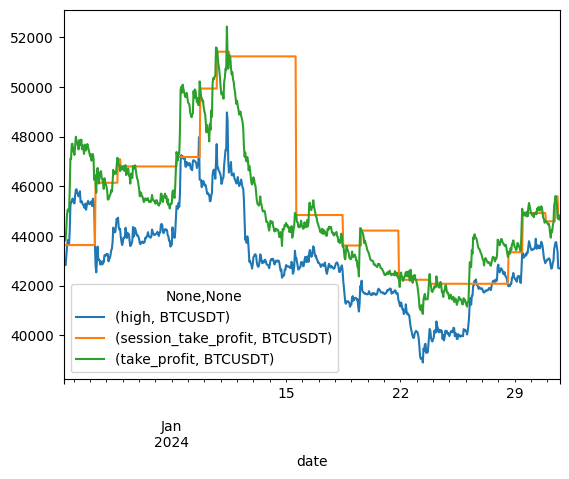

In [322]:
#Calculate the take profit
tp_indicator_length = 14
tp_mult = 3
if not any('atr' in col for col in test.columns.get_level_values(0)):
    for coin in test.columns.get_level_values(1):
        #Calculate the atr indicator
        high, low, close = test['high', coin], test['low', coin], test['close', coin]
        test['atr', coin] = ta.atr(high, low, close, length=tp_indicator_length)
        test['take_profit', coin] = test['close', coin] + tp_mult * test['atr', coin]
    
    #Remove Warm up
    test = test.iloc[tp_indicator_length:]
    

#Apply the session take profit
for coin in test.columns.get_level_values(1):
    test['session_take_profit', coin] = test['take_profit', coin].groupby(test['session', coin]).transform('first')

    #Define the take profit position
    test = test.groupby(test['session', coin], group_keys=False).apply(lambda group: define_tp_pos(group, coin))

test[[['high', 'BTCUSDT'], ['session_take_profit', 'BTCUSDT'], ['take_profit', 'BTCUSDT']]].plot()

The same process applies for percent and dollar based take profits

Putting it all together

In [323]:
def define_tp_pos(group, coin):
    if (group['high', coin] >= group['session_take_profit', coin]).any():
        start = group[group['high', coin] >= group['session_take_profit', coin]].index[0]
        stop = group.index[-2]
        group.loc[start:stop, ("position", coin)] = 1 - exit_percent
        return group
    else:
        return group

In [324]:
def plot_tp(df):
    _df = df.copy().unstack()
    # Get unique coins
    unique_coins = _df.columns.get_level_values(1).unique()

    # Determine grid dimensions
    num_coins = len(unique_coins)
    cols = 5 # You can choose the number of columns
    rows = math.ceil(num_coins / cols)

    # Create the subplots grid
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, rows * 5))

    # Flatten the axes array for easy iteration
    axes = axes.flatten() #this makes the axes a 1D array, so we can iterate over it without going for another loop

    # Plot each coin
    for i, coin in enumerate(unique_coins):
        ax = _df[[['high', coin], ['session_take_profit', coin]]].plot(
            ax=axes[i],
            title=f'{coin} Close and Take Profit',
            color=['blue', 'green'],
            legend = None
        )
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('Closing Price')
        # axes[i].legend(title='Coin')
        ax2 = ax.twinx()
        _df['position', coin].plot(ax = ax2, alpha = 0.5)

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout()
    plt.show()

In [325]:
tp_type = 'atr'
tp_percent = 0.02
tp_dollar = 100
tp_indicator_length = 14
tp_mult = 3
tp_mult = 2
exit_percent = 1
def calculate_fixed_tp(df, tp_type):
    _df = df.copy().unstack()

    if tp_type.lower() == 'rr':
        if not any('stop_loss' in col for col in _df.columns.get_level_values(0)):
            raise ValueError('No stop loss column found in the dataframe, add a stop loss to add this type of take profit')
        
        for coin in _df.columns.levels[1]:
            _df['take_profit', coin] = _df['close', coin] + tp_mult * (_df['close', coin] - _df['stop_loss', coin])
        
        _df = _df.stack(future_stack = True)

    elif tp_type.lower() == 'atr':
        if not any('atr' in col for col in _df.columns.get_level_values(0)):
            for coin in _df.columns.get_level_values(1):
                #Calculate the atr indicator
                high, low, close = _df['high', coin], _df['low', coin], _df['close', coin]
                _df['atr', coin] = ta.atr(high, low, close, length=tp_indicator_length)
            
            #Remove Warm up
            _df = _df.iloc[tp_indicator_length:]

        _df = _df.stack(future_stack = True)
        _df['take_profit'] = _df['close'] + tp_mult * _df['atr']
        
    elif tp_type.lower() == 'dollar':
        _df = _df.stack(future_stack = True)
        _df['take_profit'] = _df['close'] + tp_dollar
        
    elif tp_type.lower() == 'percent':
        _df = _df.stack(future_stack = True)
        _df['take_profit'] = _df['close'] * (1 + tp_percent)

    #Apply the session take profit
    _df = _df.unstack()
    for coin in _df.columns.get_level_values(1):
        _df['session_take_profit', coin] = _df['take_profit', coin].groupby(_df['session', coin]).transform('first')

        #Define the take profit position
        _df = test.groupby(_df['session', coin], group_keys=False).apply(lambda group: define_tp_pos(group, coin))

    return _df.stack(future_stack = True)

calculate_fixed_tp(for_testing, tp_type)

close  creturns      high  log_return  \
date                                                                    
2024-01-01 09:00:00 BTCUSDT  42612.24  1.003226  42715.55   -0.002421   
                    ETHUSDT   2300.99  1.002387   2305.11   -0.001377   
2024-01-01 10:00:00 BTCUSDT  42783.05  1.007247  42847.07    0.004000   
                    ETHUSDT   2314.70  1.008360   2318.34    0.005941   
2024-01-01 11:00:00 BTCUSDT  42725.15  1.005884  42856.00   -0.001354   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open   returns       volume  \
date                                                                     
2024-01-01 09:00:00 BTCUSDT  42580.00  42715.54 -0.002418    711.01152   
                    ETHUSDT   2294.84   2304.16 -0.001376   7316.25750   
2024-01-01 10:00:00 BTCUSDT  42586.51  42612.24  0.004008    942.70163   
                    ETHUSDT   2299.20   2300.99  0.005958  12303.53440   
2024-01-01 11:00:00 BTCUSDT  42664.42  42783.05 -0.001353    918.71056   
...                               ...       ...       ...          ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98 -0.003925  23011.28190   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  0.003976   1398.31850   
                    ETHUSDT   2269.03   2278.99  0.002962  10362.16650   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07 -0.001783   1257.92790   
                    ETHUSDT   2281.88   2285.75 -0.001142   9636.50420   

                             volume_in_dollars  volume_flag  ...  session  \
date                                                         ...            
2024-01-01 09:00:00 BTCUSDT       3.029779e+07            1  ...      0.0   
                    ETHUSDT       1.683464e+07            1  ...      0.0   
2024-01-01 10:00:00 BTCUSDT       4.033165e+07            1  ...      0.0   
                    ETHUSDT       2.847899e+07            1  ...      0.0   
2024-01-01 11:00:00 BTCUSDT       3.925205e+07            1  ...      0.0   
...                                        ...          ...  ...      ...   
2024-01-31 16:00:00 ETHUSDT       5.244271e+07            1  ...     12.0   
2024-01-31 17:00:00 BTCUSDT       5.964677e+07            1  ...     17.0   
                    ETHUSDT       2.368532e+07            1  ...     13.0   
2024-01-31 18:00:00 BTCUSDT       5.356257e+07            1  ...     17.0   
                    ETHUSDT       2.200149e+07            1  ...     13.0   

                             session_compound  overall_session_return  \
date                                                                    
2024-01-01 09:00:00 BTCUSDT          0.997585                0.024455   
                    ETHUSDT          0.998625                0.023667   
2024-01-01 10:00:00 BTCUSDT          1.001591                0.024455   
                    ETHUSDT          1.004593                0.023667   
2024-01-01 11:00:00 BTCUSDT          1.000237                0.024455   
...                                       ...                     ...   
2024-01-31 16:00:00 ETHUSDT          0.974881               -0.025119   
2024-01-31 17:00:00 BTCUSDT          1.000000                0.000000   
                    ETHUSDT          1.000000                0.000000   
2024-01-31 18:00:00 BTCUSDT          1.000000                0.000000   
                    ETHUSDT          1.000000                0.000000   

                                    atr     stop_loss  session_stop_loss  \
date                                                                       
2024-01-01 09:0

In [326]:
def calculate_dynamic_tp(df, tp_type):
    _df = df.copy().unstack()

    if tp_type.lower() == 'atr':
        if not any('atr' in col for col in _df.columns.get_level_values(0)):
            for coin in _df.columns.get_level_values(1):
                #Calculate the atr indicator
                high, low, close = _df['high', coin], _df['low', coin], _df['close', coin]
                _df['atr', coin] = ta.atr(high, low, close, length=tp_indicator_length)
            
            #Remove Warm up
            _df = _df.iloc[tp_indicator_length:]
        
        _df = _df.stack(future_stack = True)
        _df['take_profit'] = _df['close'] + tp_mult * _df['atr']

    elif tp_type.lower() == 'percent':
        _df = _df.stack(future_stack = True)
        _df['take_profit'] = _df['close'] * (1 + tp_percent)

    elif tp_type.lower() == 'dollar':
        _df = _df.stack(future_stack = True)
        _df['take_profit'] = _df['close'] + tp_dollar

    #Apply the session take profit
    _df = _df.unstack()
    for coin in _df.columns.get_level_values(1):
        _df['session_take_profit', coin] = _df['take_profit', coin].groupby(_df['session', coin]).cummin()

        #Define the take profit position
        _df = test.groupby(_df['session', coin], group_keys=False).apply(lambda group: define_tp_pos(group, coin))
    
    return _df.stack(future_stack = True)

dynamic_tp_df = calculate_dynamic_tp(for_testing, tp_type)

In [327]:
dynamic_tp_df

close  creturns      high  log_return  \
date                                                                    
2024-01-01 09:00:00 BTCUSDT  42612.24  1.003226  42715.55   -0.002421   
                    ETHUSDT   2300.99  1.002387   2305.11   -0.001377   
2024-01-01 10:00:00 BTCUSDT  42783.05  1.007247  42847.07    0.004000   
                    ETHUSDT   2314.70  1.008360   2318.34    0.005941   
2024-01-01 11:00:00 BTCUSDT  42725.15  1.005884  42856.00   -0.001354   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open   returns       volume  \
date                                                                     
2024-01-01 09:00:00 BTCUSDT  42580.00  42715.54 -0.002418    711.01152   
                    ETHUSDT   2294.84   2304.16 -0.001376   7316.25750   
2024-01-01 10:00:00 BTCUSDT  42586.51  42612.24  0.004008    942.70163   
                    ETHUSDT   2299.20   2300.99  0.005958  12303.53440   
2024-01-01 11:00:00 BTCUSDT  42664.42  42783.05 -0.001353    918.71056   
...                               ...       ...       ...          ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98 -0.003925  23011.28190   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  0.003976   1398.31850   
                    ETHUSDT   2269.03   2278.99  0.002962  10362.16650   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07 -0.001783   1257.92790   
                    ETHUSDT   2281.88   2285.75 -0.001142   9636.50420   

                             volume_in_dollars  volume_flag  ...  session  \
date                                                         ...            
2024-01-01 09:00:00 BTCUSDT       3.029779e+07            1  ...      0.0   
                    ETHUSDT       1.683464e+07            1  ...      0.0   
2024-01-01 10:00:00 BTCUSDT       4.033165e+07            1  ...      0.0   
                    ETHUSDT       2.847899e+07            1  ...      0.0   
2024-01-01 11:00:00 BTCUSDT       3.925205e+07            1  ...      0.0   
...                                        ...          ...  ...      ...   
2024-01-31 16:00:00 ETHUSDT       5.244271e+07            1  ...     12.0   
2024-01-31 17:00:00 BTCUSDT       5.964677e+07            1  ...     17.0   
                    ETHUSDT       2.368532e+07            1  ...     13.0   
2024-01-31 18:00:00 BTCUSDT       5.356257e+07            1  ...     17.0   
                    ETHUSDT       2.200149e+07            1  ...     13.0   

                             session_compound  overall_session_return  \
date                                                                    
2024-01-01 09:00:00 BTCUSDT          0.997585                0.024455   
                    ETHUSDT          0.998625                0.023667   
2024-01-01 10:00:00 BTCUSDT          1.001591                0.024455   
                    ETHUSDT          1.004593                0.023667   
2024-01-01 11:00:00 BTCUSDT          1.000237                0.024455   
...                                       ...                     ...   
2024-01-31 16:00:00 ETHUSDT          0.974881               -0.025119   
2024-01-31 17:00:00 BTCUSDT          1.000000                0.000000   
                    ETHUSDT          1.000000                0.000000   
2024-01-31 18:00:00 BTCUSDT          1.000000                0.000000   
                    ETHUSDT          1.000000                0.000000   

                                    atr     stop_loss  session_stop_loss  \
date                                                                       
2024-01-01 09:0

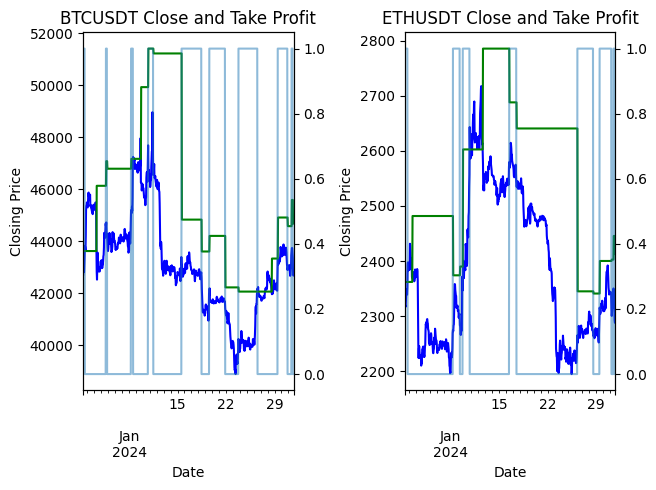

In [328]:
plot_tp(dynamic_tp_df)

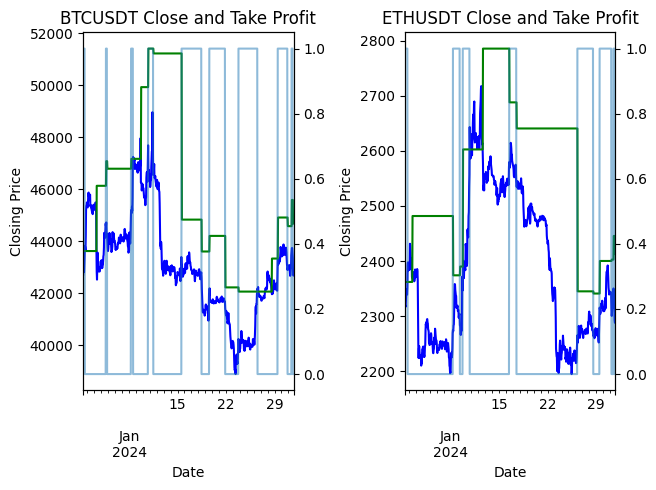

close  creturns      high  log_return  \
date                                                                    
2024-01-01 09:00:00 BTCUSDT  42612.24  1.003226  42715.55   -0.002421   
                    ETHUSDT   2300.99  1.002387   2305.11   -0.001377   
2024-01-01 10:00:00 BTCUSDT  42783.05  1.007247  42847.07    0.004000   
                    ETHUSDT   2314.70  1.008360   2318.34    0.005941   
2024-01-01 11:00:00 BTCUSDT  42725.15  1.005884  42856.00   -0.001354   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open   returns       volume  \
date                                                                     
2024-01-01 09:00:00 BTCUSDT  42580.00  42715.54 -0.002418    711.01152   
                    ETHUSDT   2294.84   2304.16 -0.001376   7316.25750   
2024-01-01 10:00:00 BTCUSDT  42586.51  42612.24  0.004008    942.70163   
                    ETHUSDT   2299.20   2300.99  0.005958  12303.53440   
2024-01-01 11:00:00 BTCUSDT  42664.42  42783.05 -0.001353    918.71056   
...                               ...       ...       ...          ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98 -0.003925  23011.28190   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  0.003976   1398.31850   
                    ETHUSDT   2269.03   2278.99  0.002962  10362.16650   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07 -0.001783   1257.92790   
                    ETHUSDT   2281.88   2285.75 -0.001142   9636.50420   

                             volume_in_dollars  volume_flag  ...  session  \
date                                                         ...            
2024-01-01 09:00:00 BTCUSDT       3.029779e+07            1  ...      0.0   
                    ETHUSDT       1.683464e+07            1  ...      0.0   
2024-01-01 10:00:00 BTCUSDT       4.033165e+07            1  ...      0.0   
                    ETHUSDT       2.847899e+07            1  ...      0.0   
2024-01-01 11:00:00 BTCUSDT       3.925205e+07            1  ...      0.0   
...                                        ...          ...  ...      ...   
2024-01-31 16:00:00 ETHUSDT       5.244271e+07            1  ...     12.0   
2024-01-31 17:00:00 BTCUSDT       5.964677e+07            1  ...     17.0   
                    ETHUSDT       2.368532e+07            1  ...     13.0   
2024-01-31 18:00:00 BTCUSDT       5.356257e+07            1  ...     17.0   
                    ETHUSDT       2.200149e+07            1  ...     13.0   

                             session_compound  overall_session_return  \
date                                                                    
2024-01-01 09:00:00 BTCUSDT          0.997585                0.018870   
                    ETHUSDT          0.998625                0.020862   
2024-01-01 10:00:00 BTCUSDT          1.001591                0.018870   
                    ETHUSDT          1.004593                0.020862   
2024-01-01 11:00:00 BTCUSDT          1.000237                0.018870   
...                                       ...                     ...   
2024-01-31 16:00:00 ETHUSDT          0.974881               -0.025119   
2024-01-31 17:00:00 BTCUSDT          1.000000                0.000000   
                    ETHUSDT          1.000000                0.000000   
2024-01-31 18:00:00 BTCUSDT          1.000000                0.000000   
                    ETHUSDT          1.000000                0.000000   

                                    atr     stop_loss  session_stop_loss  \
date                                                                       
2024-01-01 09:0

In [329]:
def apply_tp(df, fixed = True, plot = True):
    _df = calculate_fixed_tp(df, tp_type) if fixed else calculate_dynamic_tp(df, tp_type)
    if plot:
        plot_tp(_df)
    _df = Calculations().trades(_df)
    _df = Calculations().strategy_returns(_df)
    _df = Calculations().strategy_creturns(_df)
    _df = Calculations().sessions(_df)
    return _df

apply_tp(for_testing, fixed = True, plot = True)